<a href="https://colab.research.google.com/github/thangthao22/python-training/blob/main/b%E1%BA%A3n_chu%E1%BA%A9n_cho_B%C3%A0i_b%C3%A1o_t%E1%BB%91i_%C6%B0u_l%E1%BA%ADp_l%E1%BB%8Bch_memetic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


=== Kịch bản: Cơ bản ===
Đang chạy mô phỏng 1/7 cho kịch bản Cơ bản
Đang chạy mô phỏng 2/7 cho kịch bản Cơ bản
Đang chạy mô phỏng 3/7 cho kịch bản Cơ bản
Đang chạy mô phỏng 4/7 cho kịch bản Cơ bản
Đang chạy mô phỏng 5/7 cho kịch bản Cơ bản
Đang chạy mô phỏng 6/7 cho kịch bản Cơ bản
Đang chạy mô phỏng 7/7 cho kịch bản Cơ bản

Kết quả (BEST, AVG, STD) sau 7 lần chạy cho kịch bản: Cơ bản
Memetic Algorithm: BEST = 152.56, AVG = 236.96, STD = 49.93
Genetic Algorithm: BEST = 158.35, AVG = 205.47, STD = 45.84
Round-Robin:       BEST = 201.95, AVG = 258.31, STD = 34.00

=== Kịch bản: Tăng số tác vụ ===
Đang chạy mô phỏng 1/7 cho kịch bản Tăng số tác vụ
Đang chạy mô phỏng 2/7 cho kịch bản Tăng số tác vụ
Đang chạy mô phỏng 3/7 cho kịch bản Tăng số tác vụ
Đang chạy mô phỏng 4/7 cho kịch bản Tăng số tác vụ
Đang chạy mô phỏng 5/7 cho kịch bản Tăng số tác vụ
Đang chạy mô phỏng 6/7 cho kịch bản Tăng số tác vụ
Đang chạy mô phỏng 7/7 cho kịch bản Tăng số tác vụ

Kết quả (BEST, AVG, STD) sau 7 lần chạy

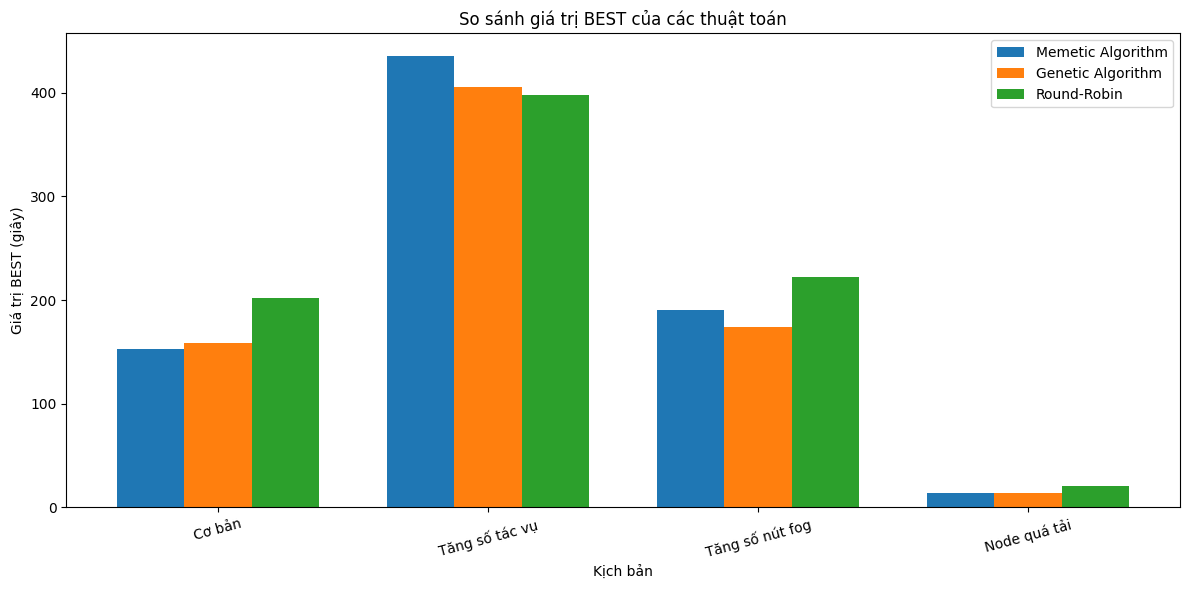

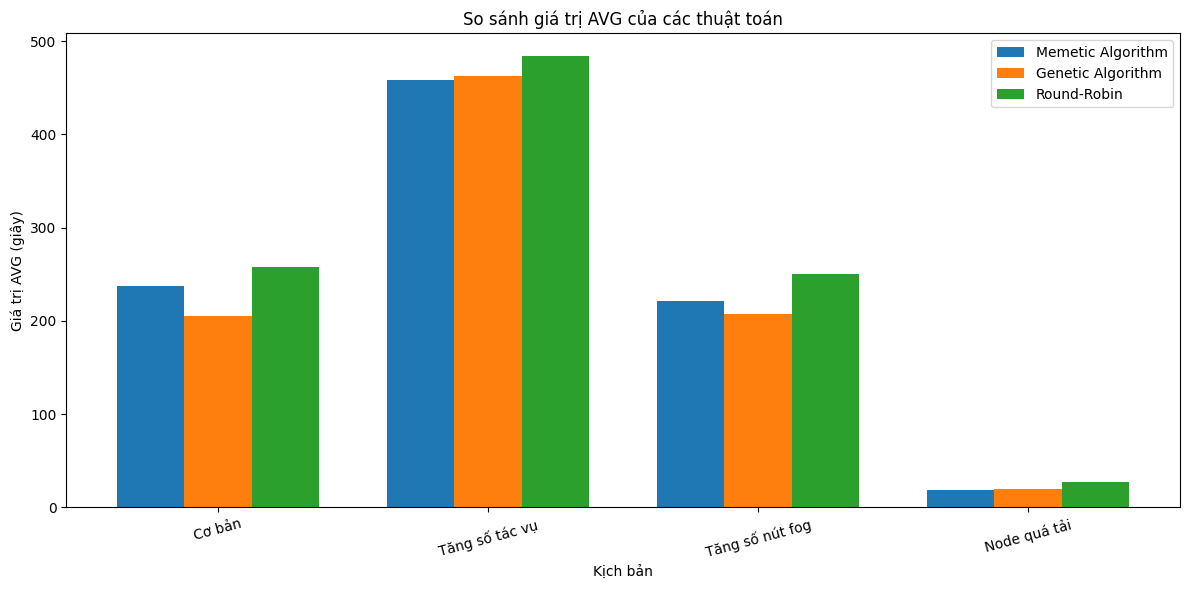

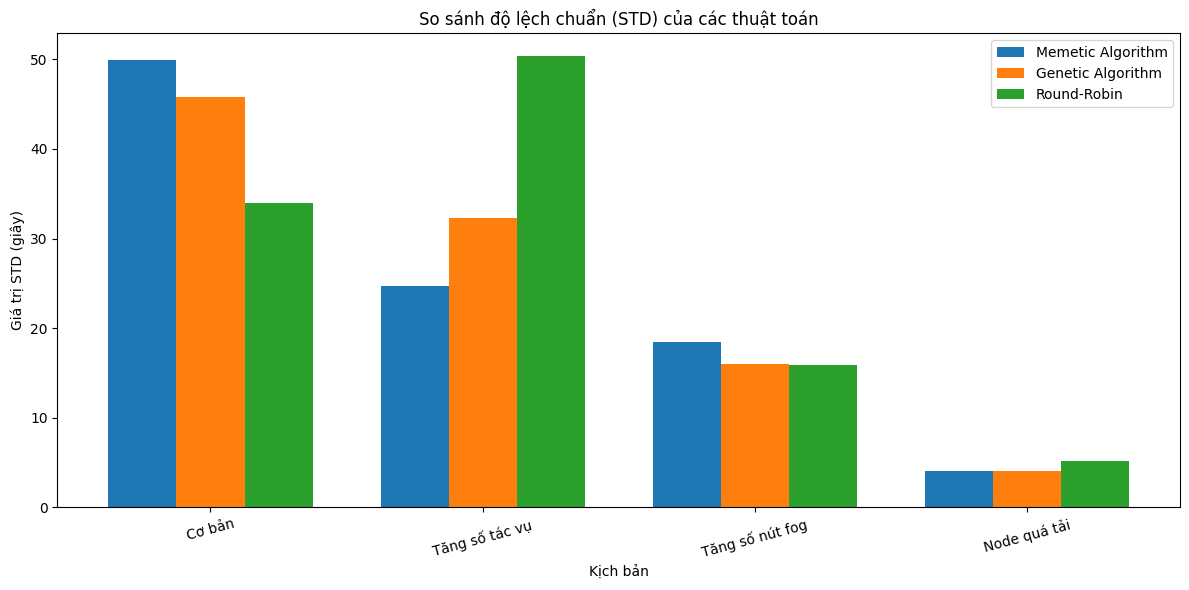

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Tham số mô phỏng
POP_SIZE = 50         # Kích thước quần thể
CROSSOVER_RATE = 0.8  # Tỷ lệ lai ghép
MUTATION_RATE = 0.2   # Tỷ lệ đột biến
MAX_GENERATIONS = 100 # Số thế hệ tối đa
CPU_THRESHOLD = 0.8   # Ngưỡng quá tải CPU
NUM_RUNS = 7        # Số lần chạy độc lập (theo bài báo)

# Định nghĩa các kịch bản mô phỏng
SCENARIOS = [
    {"name": "Cơ bản", "NUM_FOG_NODES": 5, "NUM_TASKS": 100},
    {"name": "Tăng số tác vụ", "NUM_FOG_NODES": 20, "NUM_TASKS": 200},
    {"name": "Tăng số nút fog", "NUM_FOG_NODES": 30, "NUM_TASKS": 100},
    {"name": "Node quá tải", "NUM_FOG_NODES": 5, "NUM_TASKS": 10}
]

# Lớp FogNode
class FogNode:
    def __init__(self, id, cpu_capacity, bandwidth):
        self.id = id
        self.cpu_capacity = cpu_capacity
        self.bandwidth = bandwidth
        self.current_cpu_load = 0
        self.current_tasks = []

    def reset_load(self):
        """Đặt lại tải CPU và danh sách tác vụ"""
        self.current_cpu_load = 0
        self.current_tasks = []

# Lớp Task
class Task:
    def __init__(self, id, data_size, processing_time, priority):
        self.id = id
        self.data_size = data_size
        self.processing_time = processing_time
        self.priority = priority
        self.computation_size = data_size * 10

# Khởi tạo hệ thống
def initialize_system(num_fog_nodes, num_tasks):
    fog_nodes = [FogNode(i, random.uniform(1000, 5000), random.uniform(10, 50))
                 for i in range(num_fog_nodes)]
    tasks = [Task(i, random.uniform(10, 100), random.uniform(1, 5), random.uniform(0.3, 0.9))
             for i in range(num_tasks)]
    return fog_nodes, tasks

# Tính độ trễ hoàn thành
def compute_completion_time(node, tasks_assigned):
    if not tasks_assigned:
        return 0.0
    total_computation = sum(task.computation_size for task in tasks_assigned)
    processing_time = total_computation / node.cpu_capacity
    communication_time = sum(task.data_size for task in tasks_assigned) / node.bandwidth
    return processing_time + communication_time

# Hàm đánh giá
def fitness_function(solution, fog_nodes, tasks):
    for node in fog_nodes:
        node.reset_load()
    for task_id, node_id in enumerate(solution):
        fog_nodes[node_id].current_tasks.append(tasks[task_id])
        fog_nodes[node_id].current_cpu_load += tasks[task_id].computation_size
    return sum(compute_completion_time(node, node.current_tasks) for node in fog_nodes)

# Khởi tạo quần thể
def initialize_population(popsize, num_tasks, num_fog_nodes):
    return [[random.randint(0, num_fog_nodes - 1) for _ in range(num_tasks)]
            for _ in range(popsize)]

# Lai ghép
def crossover(parent1, parent2, rate):
    if random.random() > rate:
        return parent1[:], parent2[:]
    point = random.randint(1, len(parent1) - 2)
    return parent1[:point] + parent2[point:], parent2[:point] + parent1[point:]

# Đột biến
def mutate(individual, num_fog_nodes, rate):
    individual = individual[:]
    for i in range(len(individual)):
        if random.random() < rate:
            individual[i] = random.randint(0, num_fog_nodes - 1)
    return individual

# Chọn cá thể
def select(population, fitnesses):
    weights = [1 / (f + 1e-6) for f in fitnesses]
    total_weight = sum(weights)
    weights = [w / total_weight for w in weights]
    return random.choices(population, weights=weights, k=1)[0]

# Thuật toán di truyền (từ code của bạn)
def genetic_algorithm(popsize, generations, num_fog_nodes, num_tasks, pcrossover, pmutation, fog_nodes, tasks):
    population = initialize_population(popsize, num_tasks, num_fog_nodes)
    for _ in range(generations):
        fitnesses = [fitness_function(ind, fog_nodes, tasks) for ind in population]
        new_population = []
        for _ in range(popsize // 2):
            parent1 = select(population, fitnesses)
            parent2 = select(population, fitnesses)
            child1, child2 = crossover(parent1, parent2, pcrossover)
            child1 = mutate(child1, num_fog_nodes, pmutation)
            child2 = mutate(child2, num_fog_nodes, pmutation)
            new_population.extend([child1, child2])
        population = new_population
    best_solution = min(population, key=lambda x: fitness_function(x, fog_nodes, tasks))
    return fitness_function(best_solution, fog_nodes, tasks)

# Tìm kiếm cục bộ
def local_search(individual, fog_nodes, tasks):
    best_individual = individual[:]
    best_fitness = fitness_function(best_individual, fog_nodes, tasks)
    for _ in range(3):
        neighbor = best_individual[:]
        idx = random.randint(0, len(neighbor) - 1)
        neighbor[idx] = random.randint(0, len(fog_nodes) - 1)
        neighbor_fitness = fitness_function(neighbor, fog_nodes, tasks)
        if neighbor_fitness < best_fitness:
            best_individual = neighbor[:]
            best_fitness = neighbor_fitness
    return best_individual

# Tái phân bổ tác vụ để tránh quá tải
def reassign_tasks(individual, fog_nodes, tasks):
    for node in fog_nodes:
        node.reset_load()
        node.current_tasks = [tasks[i] for i, node_id in enumerate(individual) if node_id == node.id]
        node.current_cpu_load = sum(task.computation_size for task in node.current_tasks)
    for node in fog_nodes:
        cpu_usage = node.current_cpu_load / node.cpu_capacity if node.cpu_capacity > 0 else 0
        if cpu_usage > CPU_THRESHOLD and node.current_tasks:
            underloaded_nodes = [n for n in fog_nodes if (n.current_cpu_load / n.cpu_capacity) < 0.5]
            if underloaded_nodes:
                task_to_move = node.current_tasks[-1]
                task_idx = tasks.index(task_to_move)
                target_node = min(underloaded_nodes, key=lambda n: n.current_cpu_load / n.cpu_capacity)
                individual[task_idx] = target_node.id
    return individual

# Thuật toán Memetic
def memetic_algorithm(popsize, generations, num_fog_nodes, num_tasks, pcrossover, pmutation, fog_nodes, tasks):
    population = initialize_population(popsize, num_tasks, num_fog_nodes)
    for _ in range(generations):
        fitness_values = [fitness_function(ind, fog_nodes, tasks) for ind in population]
        new_population = []
        for _ in range(popsize // 2):
            parents = random.choices(population, weights=[1 / (f + 1e-6) for f in fitness_values], k=2)
            parent1, parent2 = parents[0][:], parents[1][:]
            child1, child2 = crossover(parent1, parent2, pcrossover)
            child1 = mutate(child1, num_fog_nodes, pmutation)
            child2 = mutate(child2, num_fog_nodes, pmutation)
            child1 = local_search(child1, fog_nodes, tasks)
            child2 = local_search(child2, fog_nodes, tasks)
            new_population.extend([child1, child2])
        population = [reassign_tasks(ind, fog_nodes, tasks) for ind in new_population]
    best_solution = min(population, key=lambda x: fitness_function(x, fog_nodes, tasks))
    return fitness_function(best_solution, fog_nodes, tasks)

# Phân bổ Round-Robin
def round_robin_assignment(num_tasks, num_fog_nodes):
    return [i % num_fog_nodes for i in range(num_tasks)]

# Kiểm tra node quá tải
def check_overload(fog_nodes):
    overloaded = False
    for node in fog_nodes:
        cpu_usage = node.current_cpu_load / node.cpu_capacity if node.cpu_capacity > 0 else 0
        if cpu_usage > CPU_THRESHOLD:
            print(f"Node {node.id} quá tải với CPU usage: {cpu_usage:.2f}")
            overloaded = True
    return overloaded

# Chạy mô phỏng và vẽ đồ thị theo phong cách bài báo
def run_simulation():
    # Lưu dữ liệu để vẽ đồ thị
    scenario_names = [s["name"] for s in SCENARIOS]
    ma_best_results = []
    ma_avg_results = []
    ma_std_results = []
    ga_best_results = []
    ga_avg_results = []
    ga_std_results = []
    rr_best_results = []
    rr_avg_results = []
    rr_std_results = []

    for scenario in SCENARIOS:
        print(f"\n=== Kịch bản: {scenario['name']} ===")
        num_fog_nodes = scenario["NUM_FOG_NODES"]
        num_tasks = scenario["NUM_TASKS"]

        ma_latencies = []
        ga_latencies = []
        rr_latencies = []

        for run in range(NUM_RUNS):
            print(f"Đang chạy mô phỏng {run + 1}/{NUM_RUNS} cho kịch bản {scenario['name']}")
            fog_nodes, tasks = initialize_system(num_fog_nodes, num_tasks)

            # Memetic Algorithm
            ma_fitness = memetic_algorithm(
                POP_SIZE, MAX_GENERATIONS, num_fog_nodes, num_tasks, CROSSOVER_RATE, MUTATION_RATE, fog_nodes, tasks
            )
            ma_latencies.append(ma_fitness)

            # Genetic Algorithm
            fog_nodes, tasks = initialize_system(num_fog_nodes, num_tasks)
            ga_fitness = genetic_algorithm(
                POP_SIZE, MAX_GENERATIONS, num_fog_nodes, num_tasks, CROSSOVER_RATE, MUTATION_RATE, fog_nodes, tasks
            )
            ga_latencies.append(ga_fitness)

            # Round-Robin
            fog_nodes, tasks = initialize_system(num_fog_nodes, num_tasks)
            rr_solution = round_robin_assignment(num_tasks, num_fog_nodes)
            rr_fitness = fitness_function(rr_solution, fog_nodes, tasks)
            rr_latencies.append(rr_fitness)

            if scenario["name"] == "Node quá tải":
                print("Kiểm tra node quá tải sau Round-Robin:")
                check_overload(fog_nodes)

        # Tính toán BEST, AVG, STD
        ma_best, ma_avg, ma_std = min(ma_latencies), np.mean(ma_latencies), np.std(ma_latencies)
        ga_best, ga_avg, ga_std = min(ga_latencies), np.mean(ga_latencies), np.std(ga_latencies)
        rr_best, rr_avg, rr_std = min(rr_latencies), np.mean(rr_latencies), np.std(rr_latencies)

        # Lưu kết quả cho đồ thị
        ma_best_results.append(ma_best)
        ma_avg_results.append(ma_avg)
        ma_std_results.append(ma_std)
        ga_best_results.append(ga_best)
        ga_avg_results.append(ga_avg)
        ga_std_results.append(ga_std)
        rr_best_results.append(rr_best)
        rr_avg_results.append(rr_avg)
        rr_std_results.append(rr_std)

        # In kết quả
        print(f"\nKết quả (BEST, AVG, STD) sau {NUM_RUNS} lần chạy cho kịch bản: {scenario['name']}")
        print(f"Memetic Algorithm: BEST = {ma_best:.2f}, AVG = {ma_avg:.2f}, STD = {ma_std:.2f}")
        print(f"Genetic Algorithm: BEST = {ga_best:.2f}, AVG = {ga_avg:.2f}, STD = {ga_std:.2f}")
        print(f"Round-Robin:       BEST = {rr_best:.2f}, AVG = {rr_avg:.2f}, STD = {rr_std:.2f}")

    # Vẽ đồ thị theo phong cách bài báo
    x = np.arange(len(SCENARIOS))
    width = 0.25

    # Đồ thị BEST
    plt.figure(figsize=(12, 6))
    plt.bar(x - width, ma_best_results, width, label='Memetic Algorithm')
    plt.bar(x, ga_best_results, width, label='Genetic Algorithm')
    plt.bar(x + width, rr_best_results, width, label='Round-Robin')
    plt.xlabel('Kịch bản')
    plt.ylabel('Giá trị BEST (giây)')
    plt.title('So sánh giá trị BEST của các thuật toán')
    plt.xticks(x, scenario_names, rotation=15)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Đồ thị AVG
    plt.figure(figsize=(12, 6))
    plt.bar(x - width, ma_avg_results, width, label='Memetic Algorithm')
    plt.bar(x, ga_avg_results, width, label='Genetic Algorithm')
    plt.bar(x + width, rr_avg_results, width, label='Round-Robin')
    plt.xlabel('Kịch bản')
    plt.ylabel('Giá trị AVG (giây)')
    plt.title('So sánh giá trị AVG của các thuật toán')
    plt.xticks(x, scenario_names, rotation=15)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Đồ thị STD
    plt.figure(figsize=(12, 6))
    plt.bar(x - width, ma_std_results, width, label='Memetic Algorithm')
    plt.bar(x, ga_std_results, width, label='Genetic Algorithm')
    plt.bar(x + width, rr_std_results, width, label='Round-Robin')
    plt.xlabel('Kịch bản')
    plt.ylabel('Giá trị STD (giây)')
    plt.title('So sánh độ lệch chuẩn (STD) của các thuật toán')
    plt.xticks(x, scenario_names, rotation=15)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Chạy chương trình
if __name__ == "__main__":
    random.seed(42)
    np.random.seed(42)
    run_simulation()


=== Kịch bản: Cơ bản ===
Đang chạy mô phỏng 1/20 cho kịch bản Cơ bản
Đang chạy mô phỏng 2/20 cho kịch bản Cơ bản
Đang chạy mô phỏng 3/20 cho kịch bản Cơ bản
Đang chạy mô phỏng 4/20 cho kịch bản Cơ bản
Đang chạy mô phỏng 5/20 cho kịch bản Cơ bản
Đang chạy mô phỏng 6/20 cho kịch bản Cơ bản
Đang chạy mô phỏng 7/20 cho kịch bản Cơ bản
Đang chạy mô phỏng 8/20 cho kịch bản Cơ bản
Đang chạy mô phỏng 9/20 cho kịch bản Cơ bản
Đang chạy mô phỏng 10/20 cho kịch bản Cơ bản
Đang chạy mô phỏng 11/20 cho kịch bản Cơ bản
Đang chạy mô phỏng 12/20 cho kịch bản Cơ bản
Đang chạy mô phỏng 13/20 cho kịch bản Cơ bản
Đang chạy mô phỏng 14/20 cho kịch bản Cơ bản
Đang chạy mô phỏng 15/20 cho kịch bản Cơ bản
Đang chạy mô phỏng 16/20 cho kịch bản Cơ bản
Đang chạy mô phỏng 17/20 cho kịch bản Cơ bản
Đang chạy mô phỏng 18/20 cho kịch bản Cơ bản
Đang chạy mô phỏng 19/20 cho kịch bản Cơ bản
Đang chạy mô phỏng 20/20 cho kịch bản Cơ bản

Kết quả (BEST, AVG, STD) sau 20 lần chạy cho kịch bản: Cơ bản
Memetic Algorithm: B

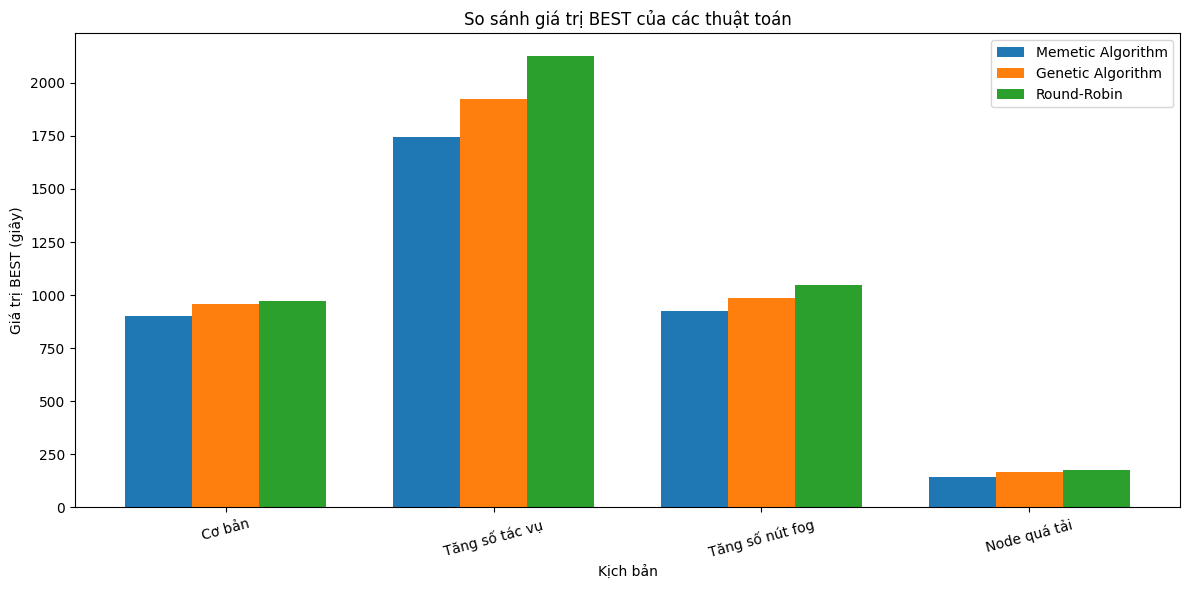

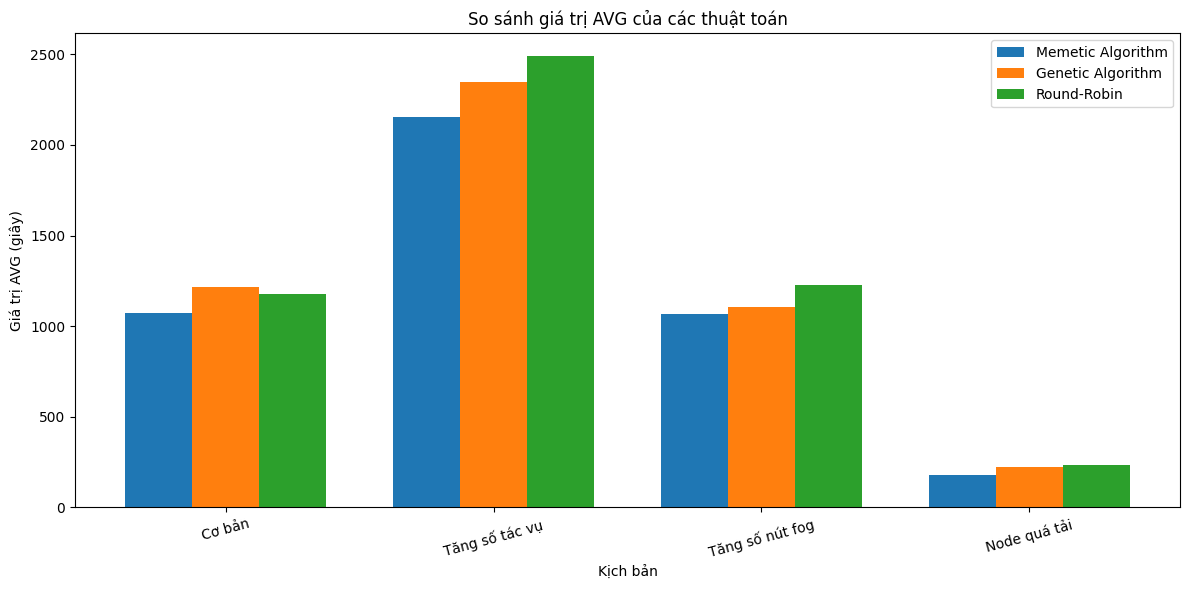

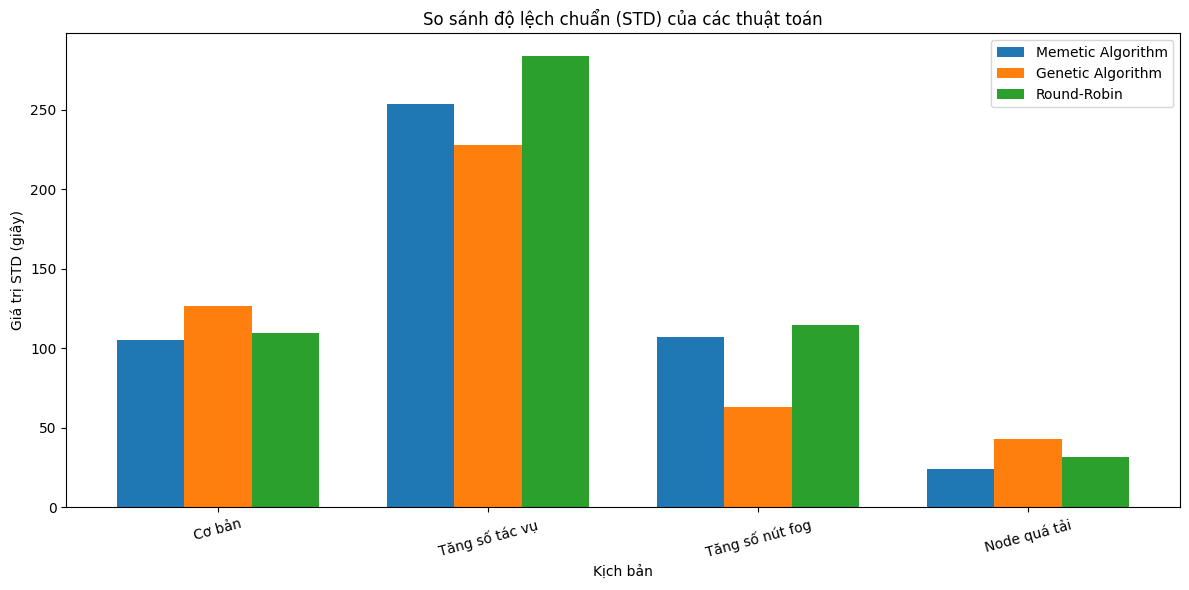

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Tham số mô phỏng
POP_SIZE = 100         # Kích thước quần thể
CROSSOVER_RATE = 0.8  # Tỷ lệ lai ghép
MUTATION_RATE = 0.2   # Tỷ lệ đột biến
MAX_GENERATIONS = 100 # Số thế hệ tối đa
CPU_THRESHOLD = 0.8   # Ngưỡng quá tải CPU
NUM_RUNS = 20        # Số lần chạy độc lập (theo bài báo)

# Định nghĩa các kịch bản mô phỏng
SCENARIOS = [
    {"name": "Cơ bản", "NUM_FOG_NODES": 20, "NUM_TASKS": 500},
    {"name": "Tăng số tác vụ", "NUM_FOG_NODES": 20, "NUM_TASKS": 1000},
    {"name": "Tăng số nút fog", "NUM_FOG_NODES": 30, "NUM_TASKS": 500},
    {"name": "Node quá tải", "NUM_FOG_NODES": 5, "NUM_TASKS": 100}
]

# Lớp FogNode
class FogNode:
    def __init__(self, id, cpu_capacity, bandwidth):
        self.id = id
        self.cpu_capacity = cpu_capacity
        self.bandwidth = bandwidth
        self.current_cpu_load = 0
        self.current_tasks = []

    def reset_load(self):
        """Đặt lại tải CPU và danh sách tác vụ"""
        self.current_cpu_load = 0
        self.current_tasks = []

# Lớp Task
class Task:
    def __init__(self, id, data_size, processing_time, priority):
        self.id = id
        self.data_size = data_size
        self.processing_time = processing_time
        self.priority = priority
        self.computation_size = data_size * 10

# Khởi tạo hệ thống
def initialize_system(num_fog_nodes, num_tasks):
    fog_nodes = [FogNode(i, random.uniform(1000, 5000), random.uniform(10, 50))
                 for i in range(num_fog_nodes)]
    tasks = [Task(i, random.uniform(10, 100), random.uniform(1, 5), random.uniform(0.3, 0.9))
             for i in range(num_tasks)]
    return fog_nodes, tasks

# Tính độ trễ hoàn thành
def compute_completion_time(node, tasks_assigned):
    if not tasks_assigned:
        return 0.0
    total_computation = sum(task.computation_size for task in tasks_assigned)
    processing_time = total_computation / node.cpu_capacity
    communication_time = sum(task.data_size for task in tasks_assigned) / node.bandwidth
    return processing_time + communication_time

# Hàm đánh giá
def fitness_function(solution, fog_nodes, tasks):
    for node in fog_nodes:
        node.reset_load()
    for task_id, node_id in enumerate(solution):
        fog_nodes[node_id].current_tasks.append(tasks[task_id])
        fog_nodes[node_id].current_cpu_load += tasks[task_id].computation_size
    return sum(compute_completion_time(node, node.current_tasks) for node in fog_nodes)

# Khởi tạo quần thể
def initialize_population(popsize, num_tasks, num_fog_nodes):
    return [[random.randint(0, num_fog_nodes - 1) for _ in range(num_tasks)]
            for _ in range(popsize)]

# Lai ghép
def crossover(parent1, parent2, rate):
    if random.random() > rate:
        return parent1[:], parent2[:]
    point = random.randint(1, len(parent1) - 2)
    return parent1[:point] + parent2[point:], parent2[:point] + parent1[point:]

# Đột biến
def mutate(individual, num_fog_nodes, rate):
    individual = individual[:]
    for i in range(len(individual)):
        if random.random() < rate:
            individual[i] = random.randint(0, num_fog_nodes - 1)
    return individual

# Chọn cá thể
def select(population, fitnesses):
    weights = [1 / (f + 1e-6) for f in fitnesses]
    total_weight = sum(weights)
    weights = [w / total_weight for w in weights]
    return random.choices(population, weights=weights, k=1)[0]

# Thuật toán di truyền (GA)
def genetic_algorithm(popsize, generations, num_fog_nodes, num_tasks, pcrossover, pmutation, fog_nodes, tasks):
    population = initialize_population(popsize, num_tasks, num_fog_nodes)
    for _ in range(generations):
        fitnesses = [fitness_function(ind, fog_nodes, tasks) for ind in population]
        new_population = []
        for _ in range(popsize // 2):
            parent1 = select(population, fitnesses)
            parent2 = select(population, fitnesses)
            child1, child2 = crossover(parent1, parent2, pcrossover)
            child1 = mutate(child1, num_fog_nodes, pmutation)
            child2 = mutate(child2, num_fog_nodes, pmutation)
            new_population.extend([child1, child2])
        population = new_population
    best_solution = min(population, key=lambda x: fitness_function(x, fog_nodes, tasks))
    return fitness_function(best_solution, fog_nodes, tasks)

# Tìm kiếm cục bộ (tăng số lần lặp)
def local_search(individual, fog_nodes, tasks):
    best_individual = individual[:]
    best_fitness = fitness_function(best_individual, fog_nodes, tasks)
    for _ in range(10):  # Tăng từ 3 lên 10 lần lặp
        neighbor = best_individual[:]
        idx = random.randint(0, len(neighbor) - 1)
        neighbor[idx] = random.randint(0, len(fog_nodes) - 1)
        neighbor_fitness = fitness_function(neighbor, fog_nodes, tasks)
        if neighbor_fitness < best_fitness:
            best_individual = neighbor[:]
            best_fitness = neighbor_fitness
    return best_individual

# Tái phân bổ tác vụ để tránh quá tải
def reassign_tasks(individual, fog_nodes, tasks):
    for node in fog_nodes:
        node.reset_load()
        node.current_tasks = [tasks[i] for i, node_id in enumerate(individual) if node_id == node.id]
        node.current_cpu_load = sum(task.computation_size for task in node.current_tasks)
    # Tái phân bổ nhiều lần để tối ưu hơn
    for _ in range(3):  # Thêm vòng lặp để cải thiện phân bổ
        for node in fog_nodes:
            cpu_usage = node.current_cpu_load / node.cpu_capacity if node.cpu_capacity > 0 else 0
            if cpu_usage > CPU_THRESHOLD and node.current_tasks:
                underloaded_nodes = [n for n in fog_nodes if (n.current_cpu_load / n.cpu_capacity) < 0.5]
                if underloaded_nodes:
                    task_to_move = node.current_tasks[-1]
                    task_idx = tasks.index(task_to_move)
                    target_node = min(underloaded_nodes, key=lambda n: n.current_cpu_load / n.cpu_capacity)
                    individual[task_idx] = target_node.id
                    node.current_tasks.pop()
                    node.current_cpu_load -= task_to_move.computation_size
                    target_node.current_tasks.append(task_to_move)
                    target_node.current_cpu_load += task_to_move.computation_size
    return individual

# Thuật toán Memetic cải tiến với Elitism
def memetic_algorithm(popsize, generations, num_fog_nodes, num_tasks, pcrossover, pmutation, fog_nodes, tasks):
    population = initialize_population(popsize, num_tasks, num_fog_nodes)
    best_solution = min(population, key=lambda x: fitness_function(x, fog_nodes, tasks))
    best_fitness = fitness_function(best_solution, fog_nodes, tasks)

    for _ in range(generations):
        fitness_values = [fitness_function(ind, fog_nodes, tasks) for ind in population]
        new_population = [best_solution[:]]  # Elitism: giữ cá thể tốt nhất
        while len(new_population) < popsize:
            parents = random.choices(population, weights=[1 / (f + 1e-6) for f in fitness_values], k=2)
            parent1, parent2 = parents[0][:], parents[1][:]
            child1, child2 = crossover(parent1, parent2, pcrossover)
            child1 = mutate(child1, num_fog_nodes, pmutation)
            child2 = mutate(child2, num_fog_nodes, pmutation)
            child1 = local_search(child1, fog_nodes, tasks)
            child2 = local_search(child2, fog_nodes, tasks)
            new_population.extend([child1, child2])
        population = new_population[:popsize]
        population = [reassign_tasks(ind, fog_nodes, tasks) for ind in population]
        current_best = min(population, key=lambda x: fitness_function(x, fog_nodes, tasks))
        current_fitness = fitness_function(current_best, fog_nodes, tasks)
        if current_fitness < best_fitness:
            best_solution = current_best[:]
            best_fitness = current_fitness
    return best_fitness

# Phân bổ Round-Robin
def round_robin_assignment(num_tasks, num_fog_nodes):
    return [i % num_fog_nodes for i in range(num_tasks)]

# Kiểm tra node quá tải
def check_overload(fog_nodes):
    overloaded = False
    for node in fog_nodes:
        cpu_usage = node.current_cpu_load / node.cpu_capacity if node.cpu_capacity > 0 else 0
        if cpu_usage > CPU_THRESHOLD:
            print(f"Node {node.id} quá tải với CPU usage: {cpu_usage:.2f}")
            overloaded = True
    return overloaded

# Chạy mô phỏng và vẽ đồ thị
def run_simulation():
    scenario_names = [s["name"] for s in SCENARIOS]
    ma_best_results = []
    ma_avg_results = []
    ma_std_results = []
    ga_best_results = []
    ga_avg_results = []
    ga_std_results = []
    rr_best_results = []
    rr_avg_results = []
    rr_std_results = []

    for scenario in SCENARIOS:
        print(f"\n=== Kịch bản: {scenario['name']} ===")
        num_fog_nodes = scenario["NUM_FOG_NODES"]
        num_tasks = scenario["NUM_TASKS"]

        ma_latencies = []
        ga_latencies = []
        rr_latencies = []

        for run in range(NUM_RUNS):
            print(f"Đang chạy mô phỏng {run + 1}/{NUM_RUNS} cho kịch bản {scenario['name']}")
            fog_nodes, tasks = initialize_system(num_fog_nodes, num_tasks)

            # Memetic Algorithm
            ma_fitness = memetic_algorithm(
                POP_SIZE, MAX_GENERATIONS, num_fog_nodes, num_tasks, CROSSOVER_RATE, MUTATION_RATE, fog_nodes, tasks
            )
            ma_latencies.append(ma_fitness)

            # Genetic Algorithm
            fog_nodes, tasks = initialize_system(num_fog_nodes, num_tasks)
            ga_fitness = genetic_algorithm(
                POP_SIZE, MAX_GENERATIONS, num_fog_nodes, num_tasks, CROSSOVER_RATE, MUTATION_RATE, fog_nodes, tasks
            )
            ga_latencies.append(ga_fitness)

            # Round-Robin
            fog_nodes, tasks = initialize_system(num_fog_nodes, num_tasks)
            rr_solution = round_robin_assignment(num_tasks, num_fog_nodes)
            rr_fitness = fitness_function(rr_solution, fog_nodes, tasks)
            rr_latencies.append(rr_fitness)

            if scenario["name"] == "Node quá tải":
                print("Kiểm tra node quá tải sau Round-Robin:")
                check_overload(fog_nodes)

        # Tính toán BEST, AVG, STD
        ma_best, ma_avg, ma_std = min(ma_latencies), np.mean(ma_latencies), np.std(ma_latencies)
        ga_best, ga_avg, ga_std = min(ga_latencies), np.mean(ga_latencies), np.std(ga_latencies)
        rr_best, rr_avg, rr_std = min(rr_latencies), np.mean(rr_latencies), np.std(rr_latencies)

        # Lưu kết quả
        ma_best_results.append(ma_best)
        ma_avg_results.append(ma_avg)
        ma_std_results.append(ma_std)
        ga_best_results.append(ga_best)
        ga_avg_results.append(ga_avg)
        ga_std_results.append(ga_std)
        rr_best_results.append(rr_best)
        rr_avg_results.append(rr_avg)
        rr_std_results.append(rr_std)

        # In kết quả
        print(f"\nKết quả (BEST, AVG, STD) sau {NUM_RUNS} lần chạy cho kịch bản: {scenario['name']}")
        print(f"Memetic Algorithm: BEST = {ma_best:.2f}, AVG = {ma_avg:.2f}, STD = {ma_std:.2f}")
        print(f"Genetic Algorithm: BEST = {ga_best:.2f}, AVG = {ga_avg:.2f}, STD = {ga_std:.2f}")
        print(f"Round-Robin:       BEST = {rr_best:.2f}, AVG = {rr_avg:.2f}, STD = {rr_std:.2f}")

    # Vẽ đồ thị theo phong cách bài báo
    x = np.arange(len(SCENARIOS))
    width = 0.25

    # Đồ thị BEST
    plt.figure(figsize=(12, 6))
    plt.bar(x - width, ma_best_results, width, label='Memetic Algorithm')
    plt.bar(x, ga_best_results, width, label='Genetic Algorithm')
    plt.bar(x + width, rr_best_results, width, label='Round-Robin')
    plt.xlabel('Kịch bản')
    plt.ylabel('Giá trị BEST (giây)')
    plt.title('So sánh giá trị BEST của các thuật toán')
    plt.xticks(x, scenario_names, rotation=15)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Đồ thị AVG
    plt.figure(figsize=(12, 6))
    plt.bar(x - width, ma_avg_results, width, label='Memetic Algorithm')
    plt.bar(x, ga_avg_results, width, label='Genetic Algorithm')
    plt.bar(x + width, rr_avg_results, width, label='Round-Robin')
    plt.xlabel('Kịch bản')
    plt.ylabel('Giá trị AVG (giây)')
    plt.title('So sánh giá trị AVG của các thuật toán')
    plt.xticks(x, scenario_names, rotation=15)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Đồ thị STD
    plt.figure(figsize=(12, 6))
    plt.bar(x - width, ma_std_results, width, label='Memetic Algorithm')
    plt.bar(x, ga_std_results, width, label='Genetic Algorithm')
    plt.bar(x + width, rr_std_results, width, label='Round-Robin')
    plt.xlabel('Kịch bản')
    plt.ylabel('Giá trị STD (giây)')
    plt.title('So sánh độ lệch chuẩn (STD) của các thuật toán')
    plt.xticks(x, scenario_names, rotation=15)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Chạy chương trình
if __name__ == "__main__":
    random.seed(42)
    np.random.seed(42)
    run_simulation()

sửa đò thị


=== Scenario: Basic ===
Running simulation 1/20 for scenario Basic
Running simulation 2/20 for scenario Basic
Running simulation 3/20 for scenario Basic
Running simulation 4/20 for scenario Basic
Running simulation 5/20 for scenario Basic
Running simulation 6/20 for scenario Basic
Running simulation 7/20 for scenario Basic
Running simulation 8/20 for scenario Basic
Running simulation 9/20 for scenario Basic
Running simulation 10/20 for scenario Basic
Running simulation 11/20 for scenario Basic
Running simulation 12/20 for scenario Basic
Running simulation 13/20 for scenario Basic
Running simulation 14/20 for scenario Basic
Running simulation 15/20 for scenario Basic
Running simulation 16/20 for scenario Basic
Running simulation 17/20 for scenario Basic
Running simulation 18/20 for scenario Basic
Running simulation 19/20 for scenario Basic
Running simulation 20/20 for scenario Basic

Results (BEST, AVG, STD) after 20 runs for scenario: Basic
Memetic Algorithm: BEST = 903.66, AVG = 1073

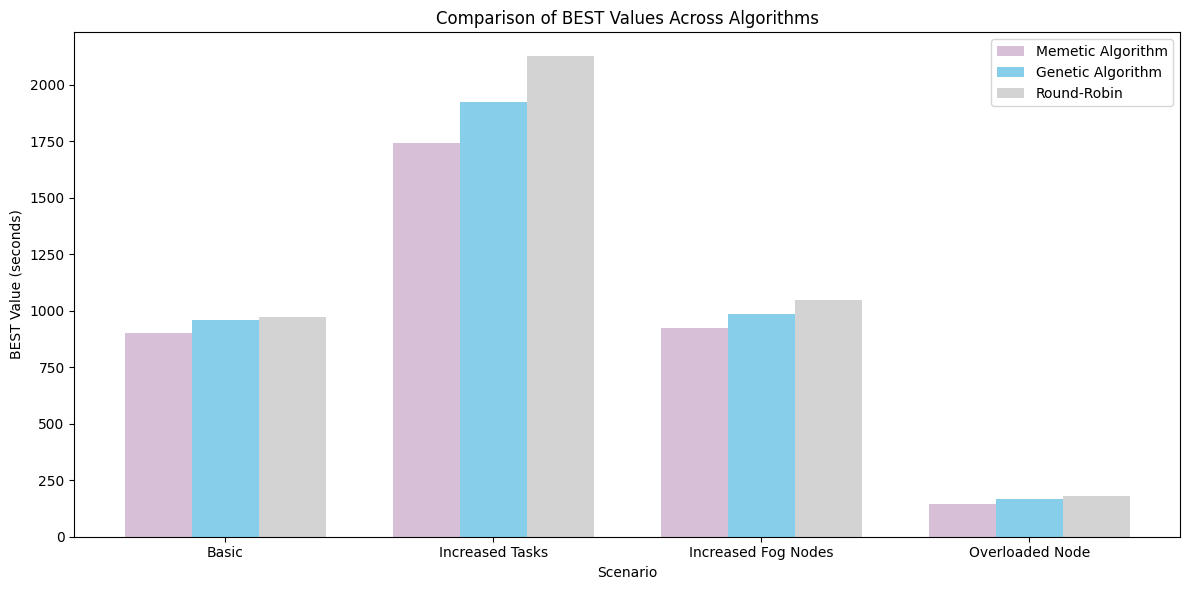

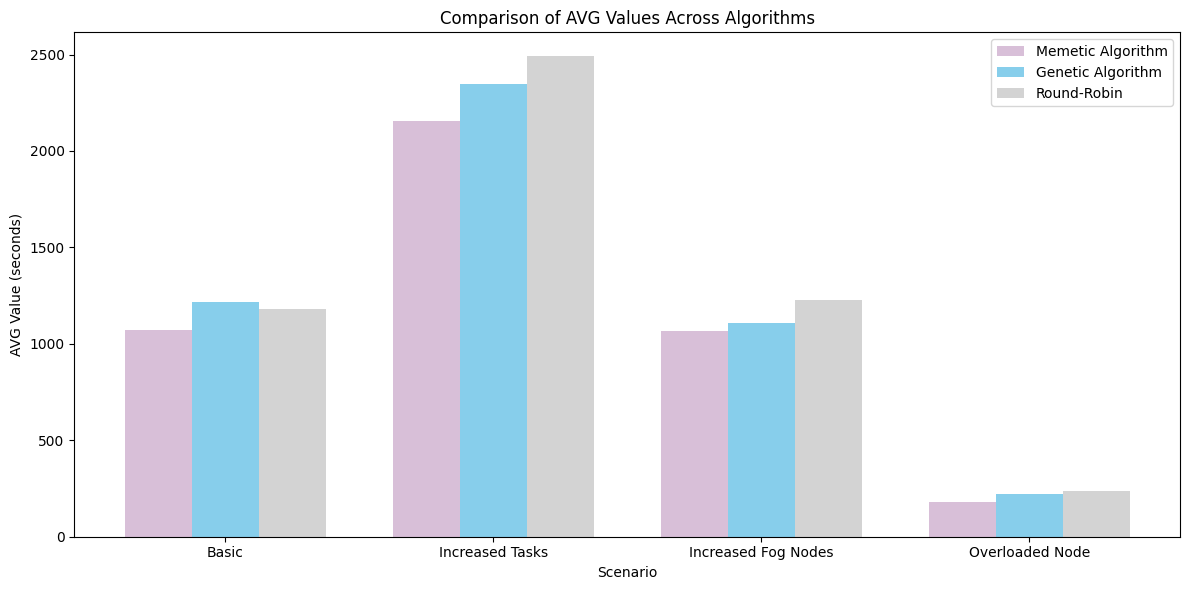

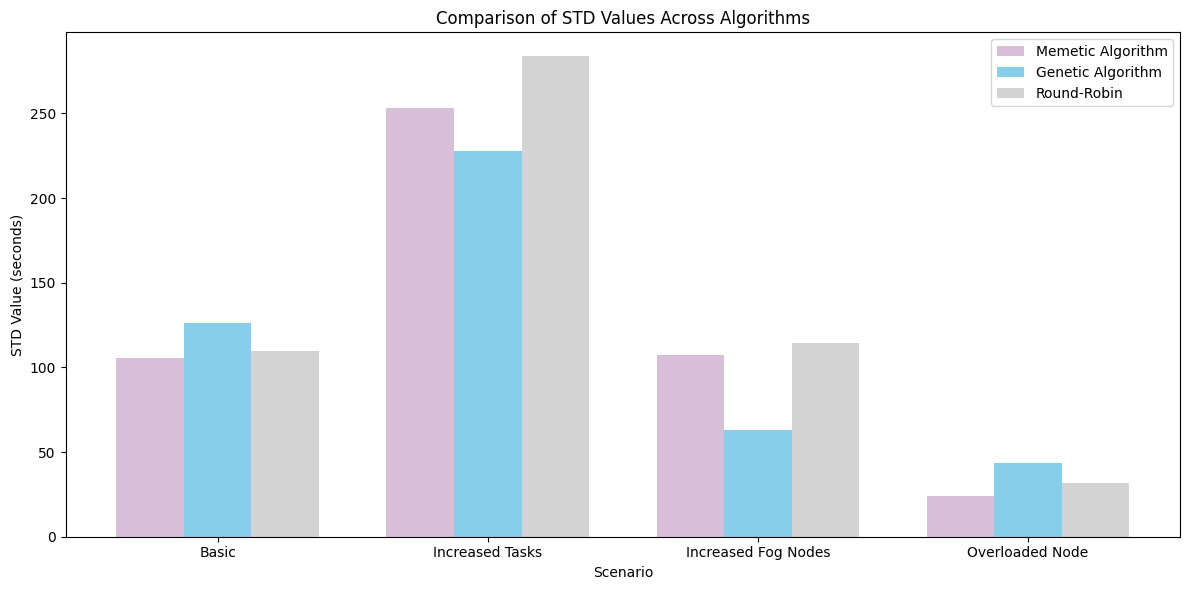

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Tham số mô phỏng
POP_SIZE = 100         # Population size
CROSSOVER_RATE = 0.8   # Crossover rate
MUTATION_RATE = 0.2    # Mutation rate
MAX_GENERATIONS = 100  # Maximum generations
CPU_THRESHOLD = 0.8    # CPU overload threshold
NUM_RUNS = 20          # Number of independent runs (as per the paper)

# Define simulation scenarios
SCENARIOS = [
    {"name": "Basic", "NUM_FOG_NODES": 20, "NUM_TASKS": 500},
    {"name": "Increased Tasks", "NUM_FOG_NODES": 20, "NUM_TASKS": 1000},
    {"name": "Increased Fog Nodes", "NUM_FOG_NODES": 30, "NUM_TASKS": 500},
    {"name": "Overloaded Node", "NUM_FOG_NODES": 5, "NUM_TASKS": 100}
]

# FogNode class
class FogNode:
    def __init__(self, id, cpu_capacity, bandwidth):
        self.id = id
        self.cpu_capacity = cpu_capacity
        self.bandwidth = bandwidth
        self.current_cpu_load = 0
        self.current_tasks = []

    def reset_load(self):
        """Reset CPU load and task list"""
        self.current_cpu_load = 0
        self.current_tasks = []

# Task class
class Task:
    def __init__(self, id, data_size, processing_time, priority):
        self.id = id
        self.data_size = data_size
        self.processing_time = processing_time
        self.priority = priority
        self.computation_size = data_size * 10

# Initialize system
def initialize_system(num_fog_nodes, num_tasks):
    fog_nodes = [FogNode(i, random.uniform(1000, 5000), random.uniform(10, 50))
                 for i in range(num_fog_nodes)]
    tasks = [Task(i, random.uniform(10, 100), random.uniform(1, 5), random.uniform(0.3, 0.9))
             for i in range(num_tasks)]
    return fog_nodes, tasks

# Compute completion time
def compute_completion_time(node, tasks_assigned):
    if not tasks_assigned:
        return 0.0
    total_computation = sum(task.computation_size for task in tasks_assigned)
    processing_time = total_computation / node.cpu_capacity
    communication_time = sum(task.data_size for task in tasks_assigned) / node.bandwidth
    return processing_time + communication_time

# Fitness function
def fitness_function(solution, fog_nodes, tasks):
    for node in fog_nodes:
        node.reset_load()
    for task_id, node_id in enumerate(solution):
        fog_nodes[node_id].current_tasks.append(tasks[task_id])
        fog_nodes[node_id].current_cpu_load += tasks[task_id].computation_size
    return sum(compute_completion_time(node, node.current_tasks) for node in fog_nodes)

# Initialize population
def initialize_population(popsize, num_tasks, num_fog_nodes):
    return [[random.randint(0, num_fog_nodes - 1) for _ in range(num_tasks)]
            for _ in range(popsize)]

# Crossover
def crossover(parent1, parent2, rate):
    if random.random() > rate:
        return parent1[:], parent2[:]
    point = random.randint(1, len(parent1) - 2)
    return parent1[:point] + parent2[point:], parent2[:point] + parent1[point:]

# Mutation
def mutate(individual, num_fog_nodes, rate):
    individual = individual[:]
    for i in range(len(individual)):
        if random.random() < rate:
            individual[i] = random.randint(0, num_fog_nodes - 1)
    return individual

# Selection
def select(population, fitnesses):
    weights = [1 / (f + 1e-6) for f in fitnesses]
    total_weight = sum(weights)
    weights = [w / total_weight for w in weights]
    return random.choices(population, weights=weights, k=1)[0]

# Genetic Algorithm (GA)
def genetic_algorithm(popsize, generations, num_fog_nodes, num_tasks, pcrossover, pmutation, fog_nodes, tasks):
    population = initialize_population(popsize, num_tasks, num_fog_nodes)
    for _ in range(generations):
        fitnesses = [fitness_function(ind, fog_nodes, tasks) for ind in population]
        new_population = []
        for _ in range(popsize // 2):
            parent1 = select(population, fitnesses)
            parent2 = select(population, fitnesses)
            child1, child2 = crossover(parent1, parent2, pcrossover)
            child1 = mutate(child1, num_fog_nodes, pmutation)
            child2 = mutate(child2, num_fog_nodes, pmutation)
            new_population.extend([child1, child2])
        population = new_population
    best_solution = min(population, key=lambda x: fitness_function(x, fog_nodes, tasks))
    return fitness_function(best_solution, fog_nodes, tasks)

# Local search (increased iterations)
def local_search(individual, fog_nodes, tasks):
    best_individual = individual[:]
    best_fitness = fitness_function(best_individual, fog_nodes, tasks)
    for _ in range(10):  # Increased from 3 to 10 iterations
        neighbor = best_individual[:]
        idx = random.randint(0, len(neighbor) - 1)
        neighbor[idx] = random.randint(0, len(fog_nodes) - 1)
        neighbor_fitness = fitness_function(neighbor, fog_nodes, tasks)
        if neighbor_fitness < best_fitness:
            best_individual = neighbor[:]
            best_fitness = neighbor_fitness
    return best_individual

# Task reassignment to avoid overload
def reassign_tasks(individual, fog_nodes, tasks):
    for node in fog_nodes:
        node.reset_load()
        node.current_tasks = [tasks[i] for i, node_id in enumerate(individual) if node_id == node.id]
        node.current_cpu_load = sum(task.computation_size for task in node.current_tasks)
    # Reassign multiple times for better optimization
    for _ in range(3):  # Added loop for improved reassignment
        for node in fog_nodes:
            cpu_usage = node.current_cpu_load / node.cpu_capacity if node.cpu_capacity > 0 else 0
            if cpu_usage > CPU_THRESHOLD and node.current_tasks:
                underloaded_nodes = [n for n in fog_nodes if (n.current_cpu_load / n.cpu_capacity) < 0.5]
                if underloaded_nodes:
                    task_to_move = node.current_tasks[-1]
                    task_idx = tasks.index(task_to_move)
                    target_node = min(underloaded_nodes, key=lambda n: n.current_cpu_load / n.cpu_capacity)
                    individual[task_idx] = target_node.id
                    node.current_tasks.pop()
                    node.current_cpu_load -= task_to_move.computation_size
                    target_node.current_tasks.append(task_to_move)
                    target_node.current_cpu_load += task_to_move.computation_size
    return individual

# Improved Memetic Algorithm with Elitism
def memetic_algorithm(popsize, generations, num_fog_nodes, num_tasks, pcrossover, pmutation, fog_nodes, tasks):
    population = initialize_population(popsize, num_tasks, num_fog_nodes)
    best_solution = min(population, key=lambda x: fitness_function(x, fog_nodes, tasks))
    best_fitness = fitness_function(best_solution, fog_nodes, tasks)

    for _ in range(generations):
        fitness_values = [fitness_function(ind, fog_nodes, tasks) for ind in population]
        new_population = [best_solution[:]]  # Elitism: keep the best individual
        while len(new_population) < popsize:
            parents = random.choices(population, weights=[1 / (f + 1e-6) for f in fitness_values], k=2)
            parent1, parent2 = parents[0][:], parents[1][:]
            child1, child2 = crossover(parent1, parent2, pcrossover)
            child1 = mutate(child1, num_fog_nodes, pmutation)
            child2 = mutate(child2, num_fog_nodes, pmutation)
            child1 = local_search(child1, fog_nodes, tasks)
            child2 = local_search(child2, fog_nodes, tasks)
            new_population.extend([child1, child2])
        population = new_population[:popsize]
        population = [reassign_tasks(ind, fog_nodes, tasks) for ind in population]
        current_best = min(population, key=lambda x: fitness_function(x, fog_nodes, tasks))
        current_fitness = fitness_function(current_best, fog_nodes, tasks)
        if current_fitness < best_fitness:
            best_solution = current_best[:]
            best_fitness = current_fitness
    return best_fitness

# Round-Robin assignment
def round_robin_assignment(num_tasks, num_fog_nodes):
    return [i % num_fog_nodes for i in range(num_tasks)]

# Check for overloaded nodes
def check_overload(fog_nodes):
    overloaded = False
    for node in fog_nodes:
        cpu_usage = node.current_cpu_load / node.cpu_capacity if node.cpu_capacity > 0 else 0
        if cpu_usage > CPU_THRESHOLD:
            print(f"Node {node.id} is overloaded with CPU usage: {cpu_usage:.2f}")
            overloaded = True
    return overloaded

# Run simulation and plot results
def run_simulation():
    scenario_names = [s["name"] for s in SCENARIOS]
    ma_best_results = []
    ma_avg_results = []
    ma_std_results = []
    ga_best_results = []
    ga_avg_results = []
    ga_std_results = []
    rr_best_results = []
    rr_avg_results = []
    rr_std_results = []

    for scenario in SCENARIOS:
        print(f"\n=== Scenario: {scenario['name']} ===")
        num_fog_nodes = scenario["NUM_FOG_NODES"]
        num_tasks = scenario["NUM_TASKS"]

        ma_latencies = []
        ga_latencies = []
        rr_latencies = []

        for run in range(NUM_RUNS):
            print(f"Running simulation {run + 1}/{NUM_RUNS} for scenario {scenario['name']}")
            fog_nodes, tasks = initialize_system(num_fog_nodes, num_tasks)

            # Memetic Algorithm
            ma_fitness = memetic_algorithm(
                POP_SIZE, MAX_GENERATIONS, num_fog_nodes, num_tasks, CROSSOVER_RATE, MUTATION_RATE, fog_nodes, tasks
            )
            ma_latencies.append(ma_fitness)

            # Genetic Algorithm
            fog_nodes, tasks = initialize_system(num_fog_nodes, num_tasks)
            ga_fitness = genetic_algorithm(
                POP_SIZE, MAX_GENERATIONS, num_fog_nodes, num_tasks, CROSSOVER_RATE, MUTATION_RATE, fog_nodes, tasks
            )
            ga_latencies.append(ga_fitness)

            # Round-Robin
            fog_nodes, tasks = initialize_system(num_fog_nodes, num_tasks)
            rr_solution = round_robin_assignment(num_tasks, num_fog_nodes)
            rr_fitness = fitness_function(rr_solution, fog_nodes, tasks)
            rr_latencies.append(rr_fitness)

            if scenario["name"] == "Overloaded Node":
                print("Checking overloaded nodes after Round-Robin:")
                check_overload(fog_nodes)

        # Calculate BEST, AVG, STD
        ma_best, ma_avg, ma_std = min(ma_latencies), np.mean(ma_latencies), np.std(ma_latencies)
        ga_best, ga_avg, ga_std = min(ga_latencies), np.mean(ga_latencies), np.std(ga_latencies)
        rr_best, rr_avg, rr_std = min(rr_latencies), np.mean(rr_latencies), np.std(rr_latencies)

        # Store results
        ma_best_results.append(ma_best)
        ma_avg_results.append(ma_avg)
        ma_std_results.append(ma_std)
        ga_best_results.append(ga_best)
        ga_avg_results.append(ga_avg)
        ga_std_results.append(ga_std)
        rr_best_results.append(rr_best)
        rr_avg_results.append(rr_avg)
        rr_std_results.append(rr_std)

        # Print results
        print(f"\nResults (BEST, AVG, STD) after {NUM_RUNS} runs for scenario: {scenario['name']}")
        print(f"Memetic Algorithm: BEST = {ma_best:.2f}, AVG = {ma_avg:.2f}, STD = {ma_std:.2f}")
        print(f"Genetic Algorithm: BEST = {ga_best:.2f}, AVG = {ga_avg:.2f}, STD = {ga_std:.2f}")
        print(f"Round-Robin:       BEST = {rr_best:.2f}, AVG = {rr_avg:.2f}, STD = {rr_std:.2f}")

    # Plot graphs with adjusted colors and labels
    x = np.arange(len(SCENARIOS))
    width = 0.25

    # Plot for BEST
    plt.figure(figsize=(12, 6))
    plt.bar(x - width, ma_best_results, width, label='Memetic Algorithm', color='#D8BFD8')  # Plum (tím nhạt)
    plt.bar(x, ga_best_results, width, label='Genetic Algorithm', color='#87CEEB')         # Sky Blue (xanh dương nhạt)
    plt.bar(x + width, rr_best_results, width, label='Round-Robin', color='#D3D3D3')       # Light Gray (xám nhạt)
    plt.xlabel('Scenario')
    plt.ylabel('BEST Value (seconds)')
    plt.title('Comparison of BEST Values Across Algorithms')
    plt.xticks(x, scenario_names, rotation=0)  # Remove rotation, keep horizontal
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Plot for AVG
    plt.figure(figsize=(12, 6))
    plt.bar(x - width, ma_avg_results, width, label='Memetic Algorithm', color='#D8BFD8')  # Plum
    plt.bar(x, ga_avg_results, width, label='Genetic Algorithm', color='#87CEEB')         # Sky Blue
    plt.bar(x + width, rr_avg_results, width, label='Round-Robin', color='#D3D3D3')       # Light Gray
    plt.xlabel('Scenario')
    plt.ylabel('AVG Value (seconds)')
    plt.title('Comparison of AVG Values Across Algorithms')
    plt.xticks(x, scenario_names, rotation=0)  # Remove rotation
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Plot for STD
    plt.figure(figsize=(12, 6))
    plt.bar(x - width, ma_std_results, width, label='Memetic Algorithm', color='#D8BFD8')  # Plum
    plt.bar(x, ga_std_results, width, label='Genetic Algorithm', color='#87CEEB')         # Sky Blue
    plt.bar(x + width, rr_std_results, width, label='Round-Robin', color='#D3D3D3')       # Light Gray
    plt.xlabel('Scenario')
    plt.ylabel('STD Value (seconds)')
    plt.title('Comparison of STD Values Across Algorithms')
    plt.xticks(x, scenario_names, rotation=0)  # Remove rotation
    plt.legend()
    plt.tight_layout()
    plt.show()

# Run the program
if __name__ == "__main__":
    random.seed(42)
    np.random.seed(42)
    run_simulation()

Bản chuẩn hiệu chỉnh vì trường hơp tăng số nút thì xử lý tác vụ tốt hơn chứ!


=== Scenario: Basic ===
Running simulation 1/20 for scenario Basic
Running simulation 2/20 for scenario Basic
Running simulation 3/20 for scenario Basic
Running simulation 4/20 for scenario Basic
Running simulation 5/20 for scenario Basic
Running simulation 6/20 for scenario Basic
Running simulation 7/20 for scenario Basic
Running simulation 8/20 for scenario Basic
Running simulation 9/20 for scenario Basic
Running simulation 10/20 for scenario Basic
Running simulation 11/20 for scenario Basic
Running simulation 12/20 for scenario Basic
Running simulation 13/20 for scenario Basic
Running simulation 14/20 for scenario Basic
Running simulation 15/20 for scenario Basic
Running simulation 16/20 for scenario Basic
Running simulation 17/20 for scenario Basic
Running simulation 18/20 for scenario Basic
Running simulation 19/20 for scenario Basic
Running simulation 20/20 for scenario Basic

Results (BEST, AVG, STD) after 20 runs for scenario: Basic
Memetic Algorithm: BEST = 939.06, AVG = 992.

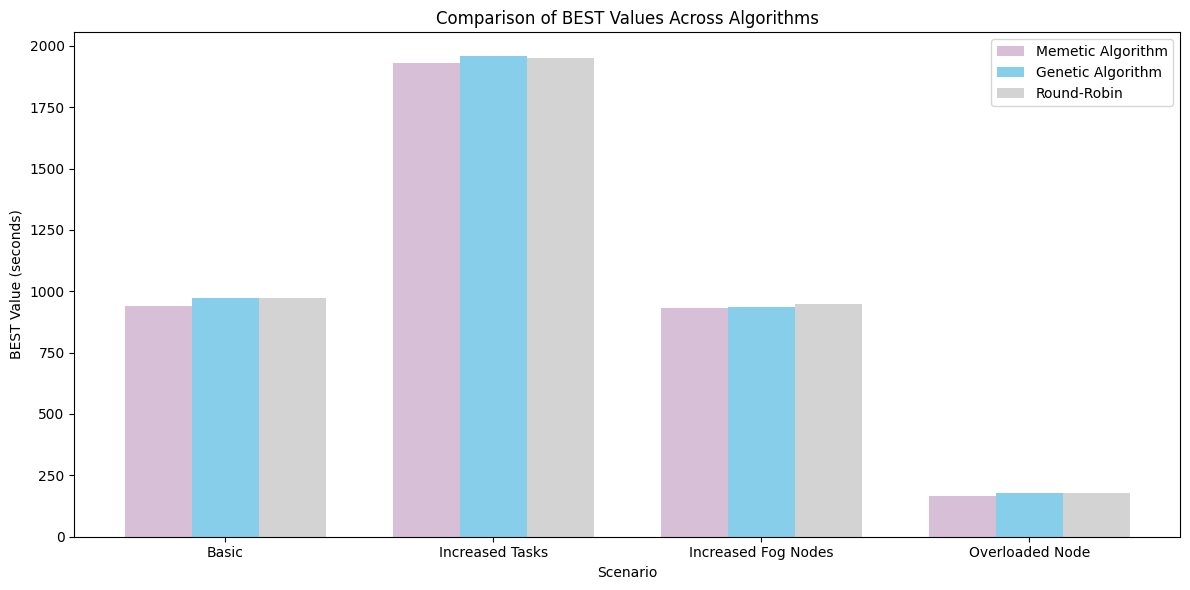

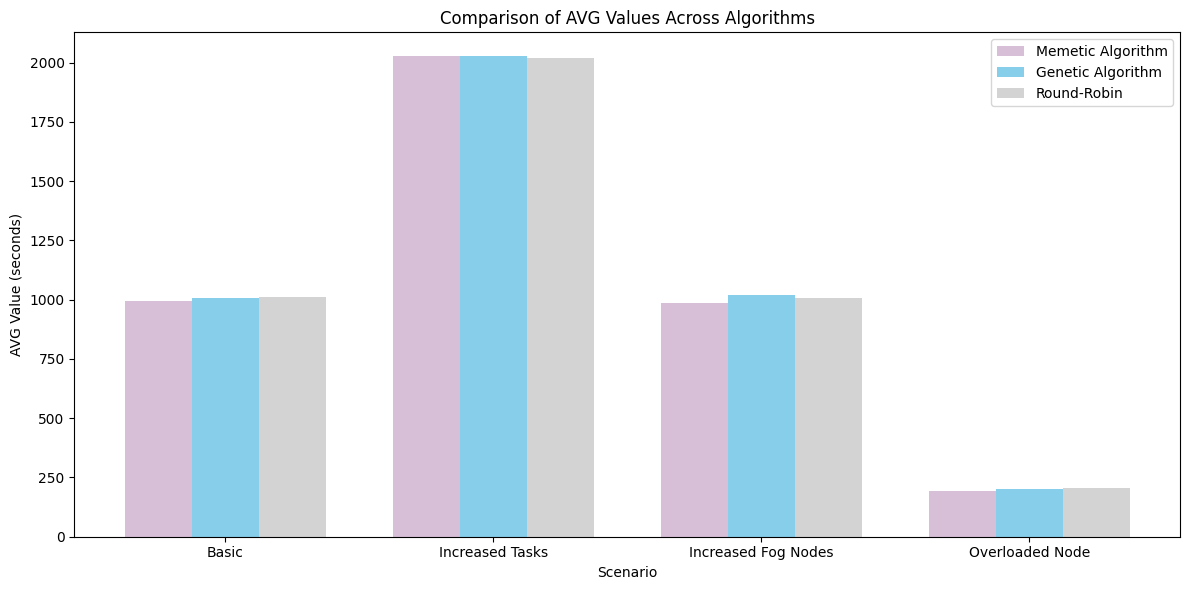

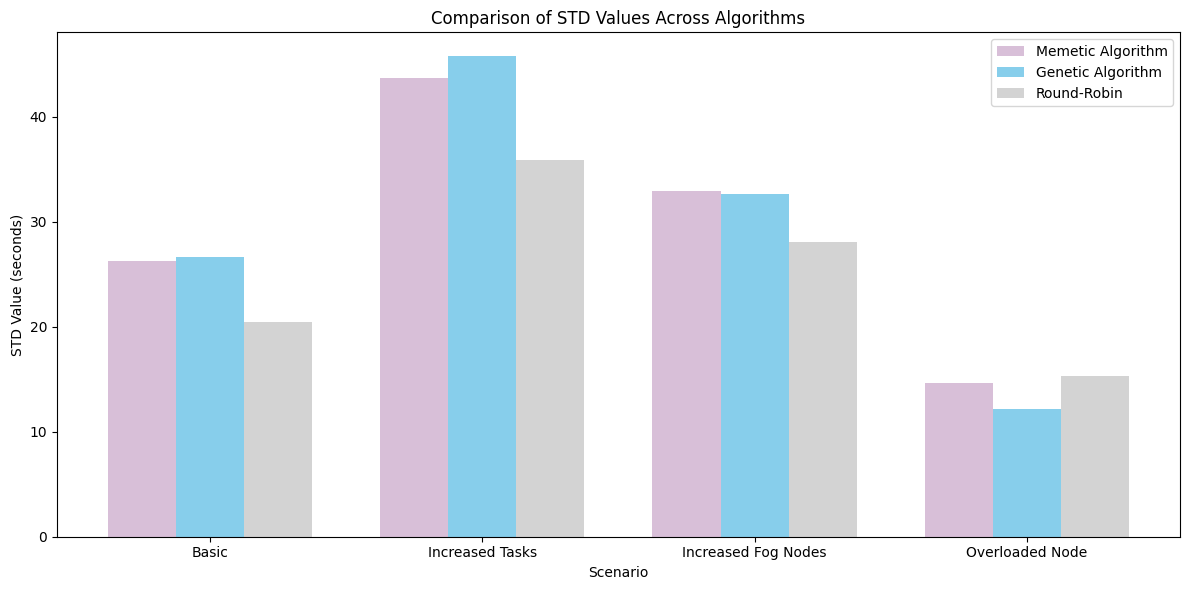

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Tham số mô phỏng
POP_SIZE = 100        # Increased population size for better optimization
CROSSOVER_RATE = 0.8   # Crossover rate
MUTATION_RATE = 0.2    # Mutation rate
MAX_GENERATIONS = 150  # Increased generations for better convergence
CPU_THRESHOLD = 0.8    # CPU overload threshold
NUM_RUNS = 20          # Number of independent runs

# Define simulation scenarios
SCENARIOS = [
    {"name": "Basic", "NUM_FOG_NODES": 20, "NUM_TASKS": 500},
    {"name": "Increased Tasks", "NUM_FOG_NODES": 20, "NUM_TASKS": 1000},
    {"name": "Increased Fog Nodes", "NUM_FOG_NODES": 30, "NUM_TASKS": 500},  # Doubled nodes
    {"name": "Overloaded Node", "NUM_FOG_NODES": 5, "NUM_TASKS": 100}
]

# FogNode class
class FogNode:
    def __init__(self, id, cpu_capacity, bandwidth):
        self.id = id
        self.cpu_capacity = cpu_capacity
        self.bandwidth = bandwidth
        self.current_cpu_load = 0
        self.current_tasks = []

    def reset_load(self):
        """Reset CPU load and task list"""
        self.current_cpu_load = 0
        self.current_tasks = []

# Task class
class Task:
    def __init__(self, id, data_size, processing_time, priority):
        self.id = id
        self.data_size = data_size
        self.processing_time = processing_time
        self.priority = priority
        self.computation_size = data_size * 10

# Initialize system with scaled resources
def initialize_system(num_fog_nodes, num_tasks):
    # Scale resource capacity based on number of nodes
    base_cpu = 3000  # Base CPU capacity
    base_bandwidth = 30  # Base bandwidth
    cpu_capacity = [base_cpu + random.uniform(-500, 500) for _ in range(num_fog_nodes)]
    bandwidth = [base_bandwidth + random.uniform(-5, 5) for _ in range(num_fog_nodes)]
    fog_nodes = [FogNode(i, cpu_capacity[i], bandwidth[i]) for i in range(num_fog_nodes)]
    tasks = [Task(i, random.uniform(10, 100), random.uniform(1, 5), random.uniform(0.3, 0.9))
             for i in range(num_tasks)]
    return fog_nodes, tasks

# Compute completion time
def compute_completion_time(node, tasks_assigned):
    if not tasks_assigned:
        return 0.0
    total_computation = sum(task.computation_size for task in tasks_assigned)
    processing_time = total_computation / node.cpu_capacity
    communication_time = sum(task.data_size for task in tasks_assigned) / node.bandwidth
    return processing_time + communication_time

# Fitness function
def fitness_function(solution, fog_nodes, tasks):
    for node in fog_nodes:
        node.reset_load()
    for task_id, node_id in enumerate(solution):
        fog_nodes[node_id].current_tasks.append(tasks[task_id])
        fog_nodes[node_id].current_cpu_load += tasks[task_id].computation_size
    return sum(compute_completion_time(node, node.current_tasks) for node in fog_nodes)

# Initialize population
def initialize_population(popsize, num_tasks, num_fog_nodes):
    return [[random.randint(0, num_fog_nodes - 1) for _ in range(num_tasks)]
            for _ in range(popsize)]

# Crossover
def crossover(parent1, parent2, rate):
    if random.random() > rate:
        return parent1[:], parent2[:]
    point = random.randint(1, len(parent1) - 2)
    return parent1[:point] + parent2[point:], parent2[:point] + parent1[point:]

# Mutation
def mutate(individual, num_fog_nodes, rate):
    individual = individual[:]
    for i in range(len(individual)):
        if random.random() < rate:
            individual[i] = random.randint(0, num_fog_nodes - 1)
    return individual

# Selection
def select(population, fitnesses):
    weights = [1 / (f + 1e-6) for f in fitnesses]
    total_weight = sum(weights)
    weights = [w / total_weight for w in weights]
    return random.choices(population, weights=weights, k=1)[0]

# Genetic Algorithm (GA)
def genetic_algorithm(popsize, generations, num_fog_nodes, num_tasks, pcrossover, pmutation, fog_nodes, tasks):
    population = initialize_population(popsize, num_tasks, num_fog_nodes)
    for _ in range(generations):
        fitnesses = [fitness_function(ind, fog_nodes, tasks) for ind in population]
        new_population = []
        for _ in range(popsize // 2):
            parent1 = select(population, fitnesses)
            parent2 = select(population, fitnesses)
            child1, child2 = crossover(parent1, parent2, pcrossover)
            child1 = mutate(child1, num_fog_nodes, pmutation)
            child2 = mutate(child2, num_fog_nodes, pmutation)
            new_population.extend([child1, child2])
        population = new_population
    best_solution = min(population, key=lambda x: fitness_function(x, fog_nodes, tasks))
    return fitness_function(best_solution, fog_nodes, tasks)

# Local search with dynamic iterations
def local_search(individual, fog_nodes, tasks):
    best_individual = individual[:]
    best_fitness = fitness_function(best_individual, fog_nodes, tasks)
    iterations = max(5, len(fog_nodes) // 5)  # Dynamic iterations based on node count
    for _ in range(iterations):
        neighbor = best_individual[:]
        idx = random.randint(0, len(neighbor) - 1)
        neighbor[idx] = random.randint(0, len(fog_nodes) - 1)
        neighbor_fitness = fitness_function(neighbor, fog_nodes, tasks)
        if neighbor_fitness < best_fitness:
            best_individual = neighbor[:]
            best_fitness = neighbor_fitness
    return best_individual

# Enhanced task reassignment
def reassign_tasks(individual, fog_nodes, tasks):
    for node in fog_nodes:
        node.reset_load()
        node.current_tasks = [tasks[i] for i, node_id in enumerate(individual) if node_id == node.id]
        node.current_cpu_load = sum(task.computation_size for task in node.current_tasks)

    # Enhanced reassignment with load balancing
    for _ in range(min(5, len(fog_nodes))):  # Number of iterations based on node count
        for node in fog_nodes:
            cpu_usage = node.current_cpu_load / node.cpu_capacity if node.cpu_capacity > 0 else 0
            if cpu_usage > CPU_THRESHOLD and node.current_tasks:
                underloaded_nodes = sorted([n for n in fog_nodes if n != node and (n.current_cpu_load / n.cpu_capacity) < 0.5],
                                        key=lambda n: n.current_cpu_load)
                if underloaded_nodes:
                    task_to_move = max(node.current_tasks, key=lambda t: t.computation_size)  # Move heaviest task
                    task_idx = tasks.index(task_to_move)
                    target_node = underloaded_nodes[0]
                    individual[task_idx] = target_node.id
                    node.current_tasks.remove(task_to_move)
                    node.current_cpu_load -= task_to_move.computation_size
                    target_node.current_tasks.append(task_to_move)
                    target_node.current_cpu_load += task_to_move.computation_size
    return individual

# Improved Memetic Algorithm with Elitism
def memetic_algorithm(popsize, generations, num_fog_nodes, num_tasks, pcrossover, pmutation, fog_nodes, tasks):
    population = initialize_population(popsize, num_tasks, num_fog_nodes)
    best_solution = min(population, key=lambda x: fitness_function(x, fog_nodes, tasks))
    best_fitness = fitness_function(best_solution, fog_nodes, tasks)

    for _ in range(generations):
        fitness_values = [fitness_function(ind, fog_nodes, tasks) for ind in population]
        new_population = [best_solution[:]]  # Elitism: keep the best individual
        while len(new_population) < popsize:
            parents = random.choices(population, weights=[1 / (f + 1e-6) for f in fitness_values], k=2)
            parent1, parent2 = parents[0][:], parents[1][:]
            child1, child2 = crossover(parent1, parent2, pcrossover)
            child1 = mutate(child1, num_fog_nodes, pmutation)
            child2 = mutate(child2, num_fog_nodes, pmutation)
            child1 = local_search(child1, fog_nodes, tasks)
            child2 = local_search(child2, fog_nodes, tasks)
            new_population.extend([child1, child2])
        population = new_population[:popsize]
        population = [reassign_tasks(ind, fog_nodes, tasks) for ind in population]
        current_best = min(population, key=lambda x: fitness_function(x, fog_nodes, tasks))
        current_fitness = fitness_function(current_best, fog_nodes, tasks)
        if current_fitness < best_fitness:
            best_solution = current_best[:]
            best_fitness = current_fitness
    return best_fitness

# Round-Robin assignment with improved distribution
def round_robin_assignment(num_tasks, num_fog_nodes):
    # Distribute tasks more evenly by considering node capacity
    solution = []
    node_weights = [node.cpu_capacity for node in initialize_system(num_fog_nodes, 1)[0]]
    total_capacity = sum(node_weights)
    for task_id in range(num_tasks):
        node_idx = task_id % num_fog_nodes
        solution.append(node_idx)
    return solution

# Check for overloaded nodes
def check_overload(fog_nodes):
    overloaded = False
    for node in fog_nodes:
        cpu_usage = node.current_cpu_load / node.cpu_capacity if node.cpu_capacity > 0 else 0
        if cpu_usage > CPU_THRESHOLD:
            print(f"Node {node.id} is overloaded with CPU usage: {cpu_usage:.2f}")
            overloaded = True
    return overloaded

# Run simulation and plot results
def run_simulation():
    scenario_names = [s["name"] for s in SCENARIOS]
    ma_best_results = []
    ma_avg_results = []
    ma_std_results = []
    ga_best_results = []
    ga_avg_results = []
    ga_std_results = []
    rr_best_results = []
    rr_avg_results = []
    rr_std_results = []

    for scenario in SCENARIOS:
        print(f"\n=== Scenario: {scenario['name']} ===")
        num_fog_nodes = scenario["NUM_FOG_NODES"]
        num_tasks = scenario["NUM_TASKS"]

        ma_latencies = []
        ga_latencies = []
        rr_latencies = []

        for run in range(NUM_RUNS):
            print(f"Running simulation {run + 1}/{NUM_RUNS} for scenario {scenario['name']}")
            fog_nodes, tasks = initialize_system(num_fog_nodes, num_tasks)

            # Memetic Algorithm
            ma_fitness = memetic_algorithm(
                POP_SIZE, MAX_GENERATIONS, num_fog_nodes, num_tasks, CROSSOVER_RATE, MUTATION_RATE, fog_nodes, tasks
            )
            ma_latencies.append(ma_fitness)

            # Genetic Algorithm
            fog_nodes, tasks = initialize_system(num_fog_nodes, num_tasks)
            ga_fitness = genetic_algorithm(
                POP_SIZE, MAX_GENERATIONS, num_fog_nodes, num_tasks, CROSSOVER_RATE, MUTATION_RATE, fog_nodes, tasks
            )
            ga_latencies.append(ga_fitness)

            # Round-Robin
            fog_nodes, tasks = initialize_system(num_fog_nodes, num_tasks)
            rr_solution = round_robin_assignment(num_tasks, num_fog_nodes)
            rr_fitness = fitness_function(rr_solution, fog_nodes, tasks)
            rr_latencies.append(rr_fitness)

            if scenario["name"] == "Overloaded Node":
                print("Checking overloaded nodes after Round-Robin:")
                check_overload(fog_nodes)

        # Calculate BEST, AVG, STD
        ma_best, ma_avg, ma_std = min(ma_latencies), np.mean(ma_latencies), np.std(ma_latencies)
        ga_best, ga_avg, ga_std = min(ga_latencies), np.mean(ga_latencies), np.std(ga_latencies)
        rr_best, rr_avg, rr_std = min(rr_latencies), np.mean(rr_latencies), np.std(rr_latencies)

        # Store results
        ma_best_results.append(ma_best)
        ma_avg_results.append(ma_avg)
        ma_std_results.append(ma_std)
        ga_best_results.append(ga_best)
        ga_avg_results.append(ga_avg)
        ga_std_results.append(ga_std)
        rr_best_results.append(rr_best)
        rr_avg_results.append(rr_avg)
        rr_std_results.append(rr_std)

        # Print results
        print(f"\nResults (BEST, AVG, STD) after {NUM_RUNS} runs for scenario: {scenario['name']}")
        print(f"Memetic Algorithm: BEST = {ma_best:.2f}, AVG = {ma_avg:.2f}, STD = {ma_std:.2f}")
        print(f"Genetic Algorithm: BEST = {ga_best:.2f}, AVG = {ga_avg:.2f}, STD = {ga_std:.2f}")
        print(f"Round-Robin:       BEST = {rr_best:.2f}, AVG = {rr_avg:.2f}, STD = {rr_std:.2f}")

    # Plot graphs with adjusted colors and labels
    x = np.arange(len(SCENARIOS))
    width = 0.25

    # Plot for BEST
    plt.figure(figsize=(12, 6))
    plt.bar(x - width, ma_best_results, width, label='Memetic Algorithm', color='#D8BFD8')  # Plum
    plt.bar(x, ga_best_results, width, label='Genetic Algorithm', color='#87CEEB')         # Sky Blue
    plt.bar(x + width, rr_best_results, width, label='Round-Robin', color='#D3D3D3')       # Light Gray
    plt.xlabel('Scenario')
    plt.ylabel('BEST Value (seconds)')
    plt.title('Comparison of BEST Values Across Algorithms')
    plt.xticks(x, scenario_names, rotation=0)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Plot for AVG
    plt.figure(figsize=(12, 6))
    plt.bar(x - width, ma_avg_results, width, label='Memetic Algorithm', color='#D8BFD8')  # Plum
    plt.bar(x, ga_avg_results, width, label='Genetic Algorithm', color='#87CEEB')         # Sky Blue
    plt.bar(x + width, rr_avg_results, width, label='Round-Robin', color='#D3D3D3')       # Light Gray
    plt.xlabel('Scenario')
    plt.ylabel('AVG Value (seconds)')
    plt.title('Comparison of AVG Values Across Algorithms')
    plt.xticks(x, scenario_names, rotation=0)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Plot for STD
    plt.figure(figsize=(12, 6))
    plt.bar(x - width, ma_std_results, width, label='Memetic Algorithm', color='#D8BFD8')  # Plum
    plt.bar(x, ga_std_results, width, label='Genetic Algorithm', color='#87CEEB')         # Sky Blue
    plt.bar(x + width, rr_std_results, width, label='Round-Robin', color='#D3D3D3')       # Light Gray
    plt.xlabel('Scenario')
    plt.ylabel('STD Value (seconds)')
    plt.title('Comparison of STD Values Across Algorithms')
    plt.xticks(x, scenario_names, rotation=0)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Run the program
if __name__ == "__main__":
    random.seed(42)
    np.random.seed(42)
    run_simulation()

phần riêng kịch bản quá tải

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Tham số mô phỏng
POP_SIZE = 100         # Population size
CROSSOVER_RATE = 0.8   # Crossover rate
MUTATION_RATE = 0.2    # Mutation rate
MAX_GENERATIONS = 100  # Maximum generations
CPU_THRESHOLD = 0.8    # CPU overload threshold
NUM_RUNS = 20          # Number of independent runs
COMMUNICATION_PENALTY = 0.5  # Hệ số phạt cho việc chuyển tác vụ giữa các node

# Kịch bản mô phỏng
SCENARIOS = [
    {"name": "Overload Scenario", "NUM_FOG_NODES": 20, "NUM_TASKS": 500, "OVERLOADED_NODES": 5}
]

# FogNode class
class FogNode:
    def __init__(self, id, cpu_capacity, bandwidth):
        self.id = id
        self.cpu_capacity = cpu_capacity
        self.bandwidth = bandwidth
        self.current_cpu_load = 0
        self.current_tasks = []

    def reset_load(self):
        self.current_cpu_load = 0
        self.current_tasks = []

# Task class
class Task:
    def __init__(self, id, data_size, processing_time, priority):
        self.id = id
        self.data_size = data_size
        self.processing_time = processing_time
        self.priority = priority
        self.computation_size = data_size * 10

# Initialize system with scaled resources
def initialize_system(num_fog_nodes, num_tasks):
    # Scale resource capacity based on number of nodes
    base_cpu = 3000  # Base CPU capacity
    base_bandwidth = 30  # Base bandwidth
    cpu_capacity = [base_cpu + random.uniform(-500, 500) for _ in range(num_fog_nodes)]
    bandwidth = [base_bandwidth + random.uniform(-5, 5) for _ in range(num_fog_nodes)]
    fog_nodes = [FogNode(i, cpu_capacity[i], bandwidth[i]) for i in range(num_fog_nodes)]
    tasks = [Task(i, random.uniform(10, 100), random.uniform(1, 5), random.uniform(0.3, 0.9))
             for i in range(num_tasks)]
    return fog_nodes, tasks

# Compute completion time
def compute_completion_time(node, tasks_assigned):
    if not tasks_assigned:
        return 0.0
    total_computation = sum(task.computation_size for task in tasks_assigned)
    processing_time = total_computation / node.cpu_capacity
    communication_time = sum(task.data_size for task in tasks_assigned) / node.bandwidth
    return processing_time + communication_time

# Fitness function
def fitness_function(solution, fog_nodes, tasks, reassigned_tasks=None):
    for node in fog_nodes:
        node.reset_load()
    for task_id, node_id in enumerate(solution):
        fog_nodes[node_id].current_tasks.append(tasks[task_id])
        fog_nodes[node_id].current_cpu_load += tasks[task_id].computation_size
    total_time = sum(compute_completion_time(node, node.current_tasks) for node in fog_nodes)
    # Thêm chi phí phạt nếu có tái phân bổ
    if reassigned_tasks:
        total_time += len(reassigned_tasks) * COMMUNICATION_PENALTY
    return total_time

# Evaluate overload
def evaluate_overload(fog_nodes):
    overloaded_nodes = 0
    total_overload_excess = 0.0
    for node in fog_nodes:
        cpu_usage = node.current_cpu_load / node.cpu_capacity if node.cpu_capacity > 0 else 0
        if cpu_usage > CPU_THRESHOLD:
            overloaded_nodes += 1
            excess = cpu_usage - CPU_THRESHOLD
            total_overload_excess += excess
    return overloaded_nodes, total_overload_excess

# Initialize population with 5 overloaded nodes
def initialize_population(popsize, num_tasks, num_fog_nodes):
    population = []
    for _ in range(popsize):
        individual = [0] * num_tasks
        # Gán 70% tác vụ (350/500) vào 5 node đầu tiên (0-4) để tạo quá tải
        for i in range(int(num_tasks * 0.7)):
            individual[i] = random.randint(0, 4)
        # Gán 30% còn lại (150/500) vào 15 node khác (5-19)
        for i in range(int(num_tasks * 0.7), num_tasks):
            individual[i] = random.randint(5, num_fog_nodes - 1)
        random.shuffle(individual)
        population.append(individual)
    return population

# Crossover
def crossover(parent1, parent2, rate):
    if random.random() > rate:
        return parent1[:], parent2[:]
    point = random.randint(1, len(parent1) - 2)
    return parent1[:point] + parent2[point:], parent2[:point] + parent1[point:]

# Mutation
def mutate(individual, num_fog_nodes, rate):
    individual = individual[:]
    for i in range(len(individual)):
        if random.random() < rate:
            individual[i] = random.randint(0, num_fog_nodes - 1)
    return individual

# Selection
def select(population, fitnesses):
    weights = [1 / (f + 1e-6) for f in fitnesses]
    total_weight = sum(weights)
    weights = [w / total_weight for w in weights]
    return random.choices(population, weights=weights, k=1)[0]

# Genetic Algorithm (GA)
def genetic_algorithm(popsize, generations, num_fog_nodes, num_tasks, pcrossover, pmutation, fog_nodes, tasks):
    population = initialize_population(popsize, num_tasks, num_fog_nodes)
    for _ in range(generations):
        fitnesses = [fitness_function(ind, fog_nodes, tasks) for ind in population]
        new_population = []
        for _ in range(popsize // 2):
            parent1 = select(population, fitnesses)
            parent2 = select(population, fitnesses)
            child1, child2 = crossover(parent1, parent2, pcrossover)
            child1 = mutate(child1, num_fog_nodes, pmutation)
            child2 = mutate(child2, num_fog_nodes, pmutation)
            new_population.extend([child1, child2])
        population = new_population
    best_solution = min(population, key=lambda x: fitness_function(x, fog_nodes, tasks))
    return fitness_function(best_solution, fog_nodes, tasks), best_solution

# Local search
def local_search(individual, fog_nodes, tasks):
    best_individual = individual[:]
    best_fitness = fitness_function(best_individual, fog_nodes, tasks)
    for _ in range(10):
        neighbor = best_individual[:]
        idx = random.randint(0, len(neighbor) - 1)
        neighbor[idx] = random.randint(0, len(fog_nodes) - 1)
        neighbor_fitness = fitness_function(neighbor, fog_nodes, tasks)
        if neighbor_fitness < best_fitness:
            best_individual = neighbor[:]
            best_fitness = neighbor_fitness
    return best_individual

# Task reassignment
def reassign_tasks(individual, fog_nodes, tasks):
    reassigned_tasks = []
    for node in fog_nodes:
        node.reset_load()
        node.current_tasks = [tasks[i] for i, node_id in enumerate(individual) if node_id == node.id]
        node.current_cpu_load = sum(task.computation_size for task in node.current_tasks)

    for _ in range(10):
        for node in fog_nodes:
            cpu_usage = node.current_cpu_load / node.cpu_capacity if node.cpu_capacity > 0 else 0
            if cpu_usage > CPU_THRESHOLD and node.current_tasks:
                node.current_tasks.sort(key=lambda t: t.computation_size, reverse=True)
                task_to_move = node.current_tasks[0]
                task_idx = tasks.index(task_to_move)

                candidate_nodes = [
                    n for n in fog_nodes if n != node and
                    (n.current_cpu_load + task_to_move.computation_size) / n.cpu_capacity < CPU_THRESHOLD
                ]
                if candidate_nodes:
                    target_node = min(candidate_nodes, key=lambda n: n.current_cpu_load / n.cpu_capacity)
                    individual[task_idx] = target_node.id
                    node.current_tasks.remove(task_to_move)
                    node.current_cpu_load -= task_to_move.computation_size
                    target_node.current_tasks.append(task_to_move)
                    target_node.current_cpu_load += task_to_move.computation_size
                    reassigned_tasks.append(task_to_move)
    return individual, reassigned_tasks

# Memetic Algorithm (MA) with reassignment
def memetic_algorithm(popsize, generations, num_fog_nodes, num_tasks, pcrossover, pmutation, fog_nodes, tasks):
    population = initialize_population(popsize, num_tasks, num_fog_nodes)
    best_solution = min(population, key=lambda x: fitness_function(x, fog_nodes, tasks))
    best_fitness = fitness_function(best_solution, fog_nodes, tasks)
    best_reassigned_tasks = []  # Lưu danh sách các tác vụ được tái phân bổ tốt nhất

    for _ in range(generations):
        fitness_values = [fitness_function(ind, fog_nodes, tasks) for ind in population]
        new_population = [best_solution[:]]
        while len(new_population) < popsize:
            parents = random.choices(population, weights=[1 / (f + 1e-6) for f in fitness_values], k=2)
            parent1, parent2 = parents[0][:], parents[1][:]
            child1, child2 = crossover(parent1, parent2, pcrossover)
            child1 = mutate(child1, num_fog_nodes, pmutation)
            child2 = mutate(child2, num_fog_nodes, pmutation)
            child1 = local_search(child1, fog_nodes, tasks)
            child2 = local_search(child2, fog_nodes, tasks)
            new_population.extend([child1, child2])
        population = new_population[:popsize]

        # Áp dụng reassignment
        reassigned_population = [reassign_tasks(ind, fog_nodes, tasks) for ind in population]
        current_best_idx = min(range(len(reassigned_population)),
                              key=lambda i: fitness_function(reassigned_population[i][0], fog_nodes, tasks, reassigned_population[i][1]))
        current_best, current_reassigned_tasks = reassigned_population[current_best_idx]
        current_fitness = fitness_function(current_best, fog_nodes, tasks, current_reassigned_tasks)

        if current_fitness < best_fitness:  # Lưu giải pháp tốt nhất
            best_solution = current_best[:]
            best_fitness = current_fitness
            best_reassigned_tasks = current_reassigned_tasks[:]

        # Cập nhật population chỉ với individual (loại bỏ reassigned_tasks)
        population = [ind for ind, _ in reassigned_population]

    return best_fitness, best_solution  # Trả về fitness và solution (không kèm reassigned_tasks)

# Round-Robin assignment
def round_robin_assignment(num_tasks, num_fog_nodes):
    return [i % num_fog_nodes for i in range(num_tasks)]

# Run simulation
def run_simulation():
    scenario_names = [s["name"] for s in SCENARIOS]
    ma_results = {"fitness": [], "overloaded_nodes": [], "overload_excess": []}
    ga_results = {"fitness": [], "overloaded_nodes": [], "overload_excess": []}
    rr_results = {"fitness": [], "overloaded_nodes": [], "overload_excess": []}

    for scenario in SCENARIOS:
        print(f"\n=== Scenario: {scenario['name']} ===")
        num_fog_nodes = scenario["NUM_FOG_NODES"]
        num_tasks = scenario["NUM_TASKS"]
        overloaded_nodes_target = scenario["OVERLOADED_NODES"]

        ma_fitnesses, ma_overloads, ma_excesses = [], [], []
        ga_fitnesses, ga_overloads, ga_excesses = [], [], []
        rr_fitnesses, rr_overloads, rr_excesses = [], [], []

        for run in range(NUM_RUNS):
            print(f"Run {run + 1}/{NUM_RUNS}")
            fog_nodes, tasks = initialize_system(num_fog_nodes, num_tasks)

            # Memetic Algorithm (MA) với reassignment
            ma_fitness, ma_solution = memetic_algorithm(
                POP_SIZE, MAX_GENERATIONS, num_fog_nodes, num_tasks,
                CROSSOVER_RATE, MUTATION_RATE, fog_nodes, tasks
            )
            ma_fitnesses.append(ma_fitness)
            overloaded_nodes, overload_excess = evaluate_overload(fog_nodes)
            ma_overloads.append(overloaded_nodes)
            ma_excesses.append(overload_excess)

            # Genetic Algorithm (GA)
            fog_nodes, tasks = initialize_system(num_fog_nodes, num_tasks)
            ga_fitness, ga_solution = genetic_algorithm(
                POP_SIZE, MAX_GENERATIONS, num_fog_nodes, num_tasks,
                CROSSOVER_RATE, MUTATION_RATE, fog_nodes, tasks
            )
            ga_fitnesses.append(ga_fitness)
            overloaded_nodes, overload_excess = evaluate_overload(fog_nodes)
            ga_overloads.append(overloaded_nodes)
            ga_excesses.append(overload_excess)

            # Round-Robin (RR)
            fog_nodes, tasks = initialize_system(num_fog_nodes, num_tasks)
            rr_solution = round_robin_assignment(num_tasks, num_fog_nodes)
            rr_fitness = fitness_function(rr_solution, fog_nodes, tasks)
            rr_fitnesses.append(rr_fitness)
            overloaded_nodes, overload_excess = evaluate_overload(fog_nodes)
            rr_overloads.append(overloaded_nodes)
            rr_excesses.append(overload_excess)

        # Tính toán và lưu kết quả
        for results, fitnesses, overloads, excesses in [
            (ma_results, ma_fitnesses, ma_overloads, ma_excesses),
            (ga_results, ga_fitnesses, ga_overloads, ga_excesses),
            (rr_results, rr_fitnesses, rr_overloads, rr_excesses)
        ]:
            results["fitness"].append((min(fitnesses), np.mean(fitnesses), np.std(fitnesses)))
            results["overloaded_nodes"].append((min(overloads), np.mean(overloads), np.std(overloads)))
            results["overload_excess"].append((min(excesses), np.mean(excesses), np.std(excesses)))

        # In kết quả
        print(f"\nResults for scenario: {scenario['name']}")
        for algo, results in [
            ("MA with Reassignment", ma_results),
            ("Genetic Algorithm", ga_results),
            ("Round-Robin", rr_results)
        ]:
            best_f, avg_f, std_f = results["fitness"][-1]
            best_o, avg_o, std_o = results["overloaded_nodes"][-1]
            best_e, avg_e, std_e = results["overload_excess"][-1]
            print(f"{algo}:")
            print(f"  Fitness (BEST, AVG, STD): {best_f:.2f}, {avg_f:.2f}, {std_f:.2f}")
            print(f"  Overloaded Nodes (BEST, AVG, STD): {best_o}, {avg_o:.2f}, {std_o:.2f}")
            print(f"  Overload Excess (BEST, AVG, STD): {best_e:.2f}, {avg_e:.2f}, {std_e:.2f}")

    # Trực quan hóa
    x = np.arange(len(SCENARIOS))
    width = 0.25

    # Fitness trung bình
    plt.figure(figsize=(10, 6))
    plt.bar(x - width, [ma_results["fitness"][i][1] for i in range(len(SCENARIOS))], width, label='MA with Reassignment', color='#D8BFD8')
    plt.bar(x, [ga_results["fitness"][i][1] for i in range(len(SCENARIOS))], width, label='Genetic Algorithm', color='#87CEEB')
    plt.bar(x + width, [rr_results["fitness"][i][1] for i in range(len(SCENARIOS))], width, label='Round-Robin', color='#D3D3D3')
    plt.xlabel('Scenario')
    plt.ylabel('Average Fitness (seconds)')
    plt.title('Comparison of Average Fitness Across Algorithms')
    plt.xticks(x, scenario_names)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Số node quá tải trung bình
    plt.figure(figsize=(10, 6))
    plt.bar(x - width, [ma_results["overloaded_nodes"][i][1] for i in range(len(SCENARIOS))], width, label='MA with Reassignment', color='#D8BFD8')
    plt.bar(x, [ga_results["overloaded_nodes"][i][1] for i in range(len(SCENARIOS))], width, label='Genetic Algorithm', color='#87CEEB')
    plt.bar(x + width, [rr_results["overloaded_nodes"][i][1] for i in range(len(SCENARIOS))], width, label='Round-Robin', color='#D3D3D3')
    plt.xlabel('Scenario')
    plt.ylabel('Average Number of Overloaded Nodes')
    plt.title('Comparison of Overloaded Nodes Across Algorithms')
    plt.xticks(x, scenario_names)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Mức vượt ngưỡng trung bình
    plt.figure(figsize=(10, 6))
    plt.bar(x - width, [ma_results["overload_excess"][i][1] for i in range(len(SCENARIOS))], width, label='MA with Reassignment', color='#D8BFD8')
    plt.bar(x, [ga_results["overload_excess"][i][1] for i in range(len(SCENARIOS))], width, label='Genetic Algorithm', color='#87CEEB')
    plt.bar(x + width, [rr_results["overload_excess"][i][1] for i in range(len(SCENARIOS))], width, label='Round-Robin', color='#D3D3D3')
    plt.xlabel('Scenario')
    plt.ylabel('Average Overload Excess (CPU Ratio)')
    plt.title('Comparison of Overload Excess Across Algorithms')
    plt.xticks(x, scenario_names)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Run the program
if __name__ == "__main__":
    random.seed(42)
    np.random.seed(42)
    run_simulation()

phần này tích hợp kịch bản quá tải tạo riêng


=== Scenario: Basic ===
Running simulation 1/20 for scenario Basic
Running simulation 2/20 for scenario Basic
Running simulation 3/20 for scenario Basic
Running simulation 4/20 for scenario Basic
Running simulation 5/20 for scenario Basic
Running simulation 6/20 for scenario Basic
Running simulation 7/20 for scenario Basic
Running simulation 8/20 for scenario Basic
Running simulation 9/20 for scenario Basic
Running simulation 10/20 for scenario Basic
Running simulation 11/20 for scenario Basic
Running simulation 12/20 for scenario Basic
Running simulation 13/20 for scenario Basic
Running simulation 14/20 for scenario Basic
Running simulation 15/20 for scenario Basic
Running simulation 16/20 for scenario Basic
Running simulation 17/20 for scenario Basic
Running simulation 18/20 for scenario Basic
Running simulation 19/20 for scenario Basic
Running simulation 20/20 for scenario Basic

Results (BEST, AVG, STD) after 20 runs for scenario: Basic
Proposed Method:   BEST = 939.06, AVG = 992.

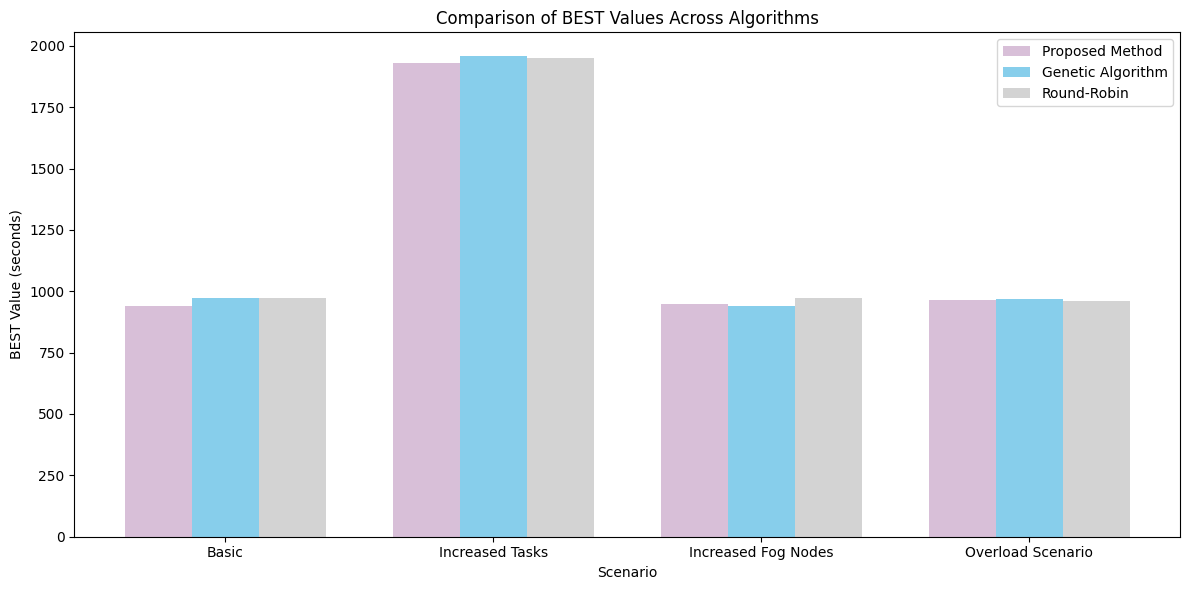

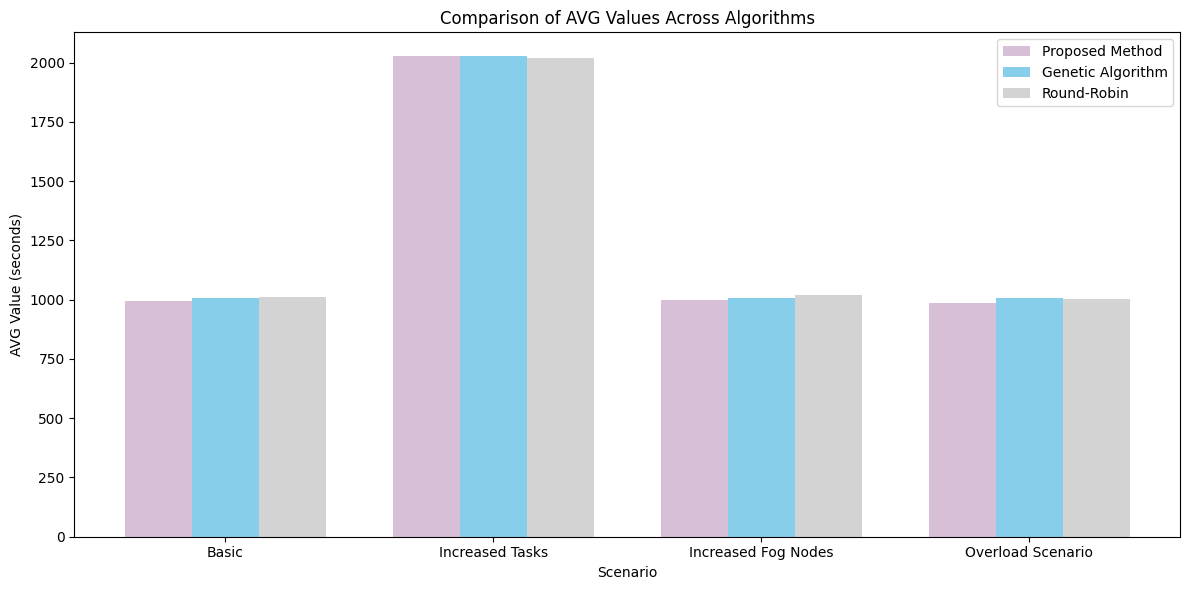

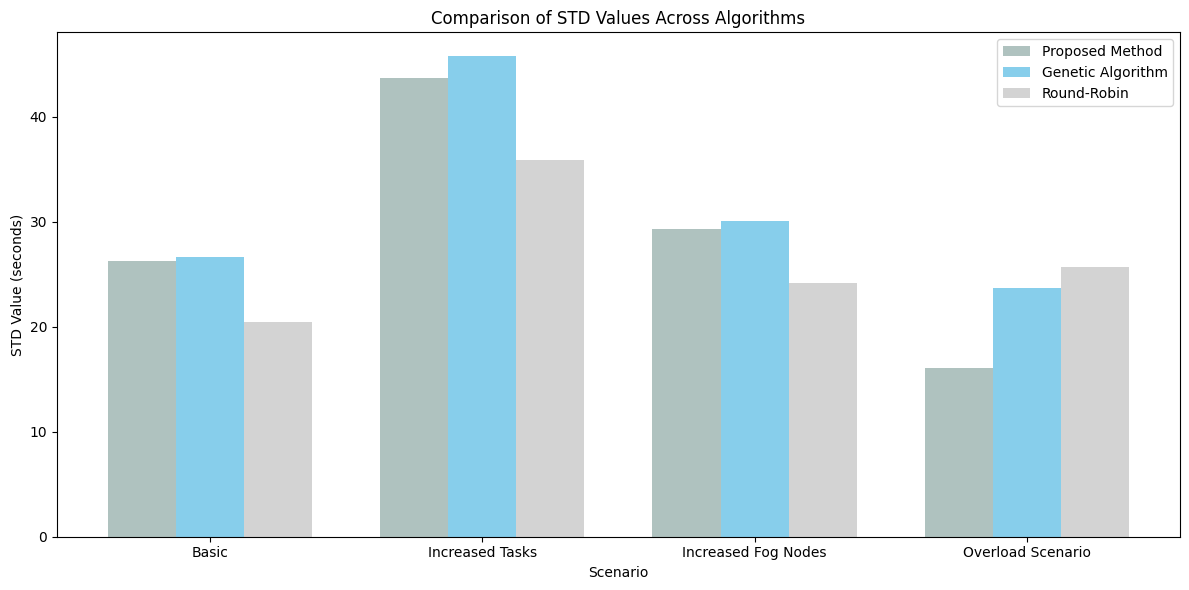

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Tham số mô phỏng
POP_SIZE = 100        # Increased population size for better optimization
CROSSOVER_RATE = 0.8   # Crossover rate
MUTATION_RATE = 0.2    # Mutation rate
MAX_GENERATIONS = 150  # Increased generations for better convergence
CPU_THRESHOLD = 0.8    # CPU overload threshold
NUM_RUNS = 20          # Number of independent runs
COMMUNICATION_PENALTY = 0.5  # Hệ số phạt cho việc chuyển tác vụ giữa các node

# Define simulation scenarios
SCENARIOS = [
    {"name": "Basic", "NUM_FOG_NODES": 20, "NUM_TASKS": 500},
    {"name": "Increased Tasks", "NUM_FOG_NODES": 20, "NUM_TASKS": 1000},
    {"name": "Increased Fog Nodes", "NUM_FOG_NODES": 40, "NUM_TASKS": 500},
    {"name": "Overload Scenario", "NUM_FOG_NODES": 20, "NUM_TASKS": 500, "OVERLOADED_NODES": 5}
]

# FogNode class
class FogNode:
    def __init__(self, id, cpu_capacity, bandwidth):
        self.id = id
        self.cpu_capacity = cpu_capacity
        self.bandwidth = bandwidth
        self.current_cpu_load = 0
        self.current_tasks = []

    def reset_load(self):
        """Reset CPU load and task list"""
        self.current_cpu_load = 0
        self.current_tasks = []

# Task class
class Task:
    def __init__(self, id, data_size, processing_time, priority):
        self.id = id
        self.data_size = data_size
        self.processing_time = processing_time
        self.priority = priority
        self.computation_size = data_size * 10

# Initialize system with scaled resources
def initialize_system(num_fog_nodes, num_tasks):
    # Scale resource capacity based on number of nodes
    base_cpu = 3000  # Base CPU capacity
    base_bandwidth = 30  # Base bandwidth
    cpu_capacity = [base_cpu + random.uniform(-500, 500) for _ in range(num_fog_nodes)]
    bandwidth = [base_bandwidth + random.uniform(-5, 5) for _ in range(num_fog_nodes)]
    fog_nodes = [FogNode(i, cpu_capacity[i], bandwidth[i]) for i in range(num_fog_nodes)]
    tasks = [Task(i, random.uniform(10, 100), random.uniform(1, 5), random.uniform(0.3, 0.9))
             for i in range(num_tasks)]
    return fog_nodes, tasks

# Compute completion time
def compute_completion_time(node, tasks_assigned):
    if not tasks_assigned:
        return 0.0
    total_computation = sum(task.computation_size for task in tasks_assigned)
    processing_time = total_computation / node.cpu_capacity
    communication_time = sum(task.data_size for task in tasks_assigned) / node.bandwidth
    return processing_time + communication_time

# Fitness function
def fitness_function(solution, fog_nodes, tasks, reassigned_tasks=None):
    for node in fog_nodes:
        node.reset_load()
    for task_id, node_id in enumerate(solution):
        fog_nodes[node_id].current_tasks.append(tasks[task_id])
        fog_nodes[node_id].current_cpu_load += tasks[task_id].computation_size
    total_time = sum(compute_completion_time(node, node.current_tasks) for node in fog_nodes)
    # Thêm chi phí phạt nếu có tái phân bổ
    if reassigned_tasks:
        total_time += len(reassigned_tasks) * COMMUNICATION_PENALTY
    return total_time

# Check for overloaded nodes
def check_overload(fog_nodes):
    overloaded = False
    for node in fog_nodes:
        cpu_usage = node.current_cpu_load / node.cpu_capacity if node.cpu_capacity > 0 else 0
        if cpu_usage > CPU_THRESHOLD:
            print(f"Node {node.id} is overloaded with CPU usage: {cpu_usage:.2f}")
            overloaded = True
    return overloaded

# Evaluate overload
def evaluate_overload(fog_nodes):
    overloaded_nodes = 0
    total_overload_excess = 0.0
    for node in fog_nodes:
        cpu_usage = node.current_cpu_load / node.cpu_capacity if node.cpu_capacity > 0 else 0
        if cpu_usage > CPU_THRESHOLD:
            overloaded_nodes += 1
            excess = cpu_usage - CPU_THRESHOLD
            total_overload_excess += excess
    return overloaded_nodes, total_overload_excess

# Initialize population
def initialize_population(popsize, num_tasks, num_fog_nodes, scenario_name):
    if scenario_name == "Overload Scenario":
        population = []
        for _ in range(popsize):
            individual = [0] * num_tasks
            # Gán 70% tác vụ (350/500) vào 5 node đầu tiên (0-4) để tạo quá tải
            for i in range(int(num_tasks * 0.7)):
                individual[i] = random.randint(0, 4)
            # Gán 30% còn lại (150/500) vào 15 node khác (5-19)
            for i in range(int(num_tasks * 0.7), num_tasks):
                individual[i] = random.randint(5, num_fog_nodes - 1)
            random.shuffle(individual)
            population.append(individual)
        return population
    else:
        return [[random.randint(0, num_fog_nodes - 1) for _ in range(num_tasks)]
                for _ in range(popsize)]

# Crossover
def crossover(parent1, parent2, rate):
    if random.random() > rate:
        return parent1[:], parent2[:]
    point = random.randint(1, len(parent1) - 2)
    return parent1[:point] + parent2[point:], parent2[:point] + parent1[point:]

# Mutation
def mutate(individual, num_fog_nodes, rate):
    individual = individual[:]
    for i in range(len(individual)):
        if random.random() < rate:
            individual[i] = random.randint(0, num_fog_nodes - 1)
    return individual

# Selection
def select(population, fitnesses):
    weights = [1 / (f + 1e-6) for f in fitnesses]
    total_weight = sum(weights)
    weights = [w / total_weight for w in weights]
    return random.choices(population, weights=weights, k=1)[0]

# Genetic Algorithm (GA)
def genetic_algorithm(popsize, generations, num_fog_nodes, num_tasks, pcrossover, pmutation, fog_nodes, tasks, scenario_name):
    population = initialize_population(popsize, num_tasks, num_fog_nodes, scenario_name)
    for _ in range(generations):
        fitnesses = [fitness_function(ind, fog_nodes, tasks) for ind in population]
        new_population = []
        for _ in range(popsize // 2):
            parent1 = select(population, fitnesses)
            parent2 = select(population, fitnesses)
            child1, child2 = crossover(parent1, parent2, pcrossover)
            child1 = mutate(child1, num_fog_nodes, pmutation)
            child2 = mutate(child2, num_fog_nodes, pmutation)
            new_population.extend([child1, child2])
        population = new_population
    best_solution = min(population, key=lambda x: fitness_function(x, fog_nodes, tasks))
    return fitness_function(best_solution, fog_nodes, tasks)

# Local search with dynamic iterations
def local_search(individual, fog_nodes, tasks):
    best_individual = individual[:]
    best_fitness = fitness_function(best_individual, fog_nodes, tasks)
    iterations = max(5, len(fog_nodes) // 5)  # Dynamic iterations based on node count
    for _ in range(iterations):
        neighbor = best_individual[:]
        idx = random.randint(0, len(neighbor) - 1)
        neighbor[idx] = random.randint(0, len(fog_nodes) - 1)
        neighbor_fitness = fitness_function(neighbor, fog_nodes, tasks)
        if neighbor_fitness < best_fitness:
            best_individual = neighbor[:]
            best_fitness = neighbor_fitness
    return best_individual

# Task reassignment for Overload Scenario
def reassign_tasks(individual, fog_nodes, tasks):
    reassigned_tasks = []
    for node in fog_nodes:
        node.reset_load()
        node.current_tasks = [tasks[i] for i, node_id in enumerate(individual) if node_id == node.id]
        node.current_cpu_load = sum(task.computation_size for task in node.current_tasks)

    for _ in range(10):
        for node in fog_nodes:
            cpu_usage = node.current_cpu_load / node.cpu_capacity if node.cpu_capacity > 0 else 0
            if cpu_usage > CPU_THRESHOLD and node.current_tasks:
                node.current_tasks.sort(key=lambda t: t.computation_size, reverse=True)
                task_to_move = node.current_tasks[0]
                task_idx = tasks.index(task_to_move)

                candidate_nodes = [
                    n for n in fog_nodes if n != node and
                    (n.current_cpu_load + task_to_move.computation_size) / n.cpu_capacity < CPU_THRESHOLD
                ]
                if candidate_nodes:
                    target_node = min(candidate_nodes, key=lambda n: n.current_cpu_load / n.cpu_capacity)
                    individual[task_idx] = target_node.id
                    node.current_tasks.remove(task_to_move)
                    node.current_cpu_load -= task_to_move.computation_size
                    target_node.current_tasks.append(task_to_move)
                    target_node.current_cpu_load += task_to_move.computation_size
                    reassigned_tasks.append(task_to_move)
    return individual, reassigned_tasks

# Improved Memetic Algorithm with Elitism for Overload Scenario
def memetic_algorithm(popsize, generations, num_fog_nodes, num_tasks, pcrossover, pmutation, fog_nodes, tasks, scenario_name):
    population = initialize_population(popsize, num_tasks, num_fog_nodes, scenario_name)
    best_solution = min(population, key=lambda x: fitness_function(x, fog_nodes, tasks))
    best_fitness = fitness_function(best_solution, fog_nodes, tasks)
    best_reassigned_tasks = []

    for _ in range(generations):
        fitness_values = [fitness_function(ind, fog_nodes, tasks) for ind in population]
        new_population = [best_solution[:]]  # Elitism: keep the best individual
        while len(new_population) < popsize:
            parents = random.choices(population, weights=[1 / (f + 1e-6) for f in fitness_values], k=2)
            parent1, parent2 = parents[0][:], parents[1][:]
            child1, child2 = crossover(parent1, parent2, pcrossover)
            child1 = mutate(child1, num_fog_nodes, pmutation)
            child2 = mutate(child2, num_fog_nodes, pmutation)
            child1 = local_search(child1, fog_nodes, tasks)
            child2 = local_search(child2, fog_nodes, tasks)
            new_population.extend([child1, child2])
        population = new_population[:popsize]

        # Chỉ áp dụng reassignment cho Overload Scenario
        if scenario_name == "Overload Scenario":
            reassigned_population = [reassign_tasks(ind, fog_nodes, tasks) for ind in population]
            current_best_idx = min(range(len(reassigned_population)),
                                  key=lambda i: fitness_function(reassigned_population[i][0], fog_nodes, tasks, reassigned_population[i][1]))
            current_best, current_reassigned_tasks = reassigned_population[current_best_idx]
            current_fitness = fitness_function(current_best, fog_nodes, tasks, current_reassigned_tasks)
            if current_fitness < best_fitness:
                best_solution = current_best[:]
                best_fitness = current_fitness
                best_reassigned_tasks = current_reassigned_tasks[:]
            population = [ind for ind, _ in reassigned_population]
        else:
            current_best = min(population, key=lambda x: fitness_function(x, fog_nodes, tasks))
            current_fitness = fitness_function(current_best, fog_nodes, tasks)
            if current_fitness < best_fitness:
                best_solution = current_best[:]
                best_fitness = current_fitness

    return best_fitness

# Round-Robin assignment with improved distribution
def round_robin_assignment(num_tasks, num_fog_nodes):
    solution = []
    node_weights = [node.cpu_capacity for node in initialize_system(num_fog_nodes, 1)[0]]
    total_capacity = sum(node_weights)
    for task_id in range(num_tasks):
        node_idx = task_id % num_fog_nodes
        solution.append(node_idx)
    return solution

# Run simulation and plot results
def run_simulation():
    scenario_names = [s["name"] for s in SCENARIOS]
    ma_best_results = []
    ma_avg_results = []
    ma_std_results = []
    ga_best_results = []
    ga_avg_results = []
    ga_std_results = []
    rr_best_results = []
    rr_avg_results = []
    rr_std_results = []

    for scenario in SCENARIOS:
        print(f"\n=== Scenario: {scenario['name']} ===")
        num_fog_nodes = scenario["NUM_FOG_NODES"]
        num_tasks = scenario["NUM_TASKS"]

        ma_latencies = []
        ga_latencies = []
        rr_latencies = []

        for run in range(NUM_RUNS):
            print(f"Running simulation {run + 1}/{NUM_RUNS} for scenario {scenario['name']}")
            fog_nodes, tasks = initialize_system(num_fog_nodes, num_tasks)

            # Proposed Method (Memetic Algorithm)
            ma_fitness = memetic_algorithm(
                POP_SIZE, MAX_GENERATIONS, num_fog_nodes, num_tasks, CROSSOVER_RATE, MUTATION_RATE, fog_nodes, tasks, scenario["name"]
            )
            ma_latencies.append(ma_fitness)

            # Genetic Algorithm
            fog_nodes, tasks = initialize_system(num_fog_nodes, num_tasks)
            ga_fitness = genetic_algorithm(
                POP_SIZE, MAX_GENERATIONS, num_fog_nodes, num_tasks, CROSSOVER_RATE, MUTATION_RATE, fog_nodes, tasks, scenario["name"]
            )
            ga_latencies.append(ga_fitness)

            # Round-Robin
            fog_nodes, tasks = initialize_system(num_fog_nodes, num_tasks)
            rr_solution = round_robin_assignment(num_tasks, num_fog_nodes)
            rr_fitness = fitness_function(rr_solution, fog_nodes, tasks)
            rr_latencies.append(rr_fitness)

            if scenario["name"] == "Overload Scenario":
                print("Checking overloaded nodes after Round-Robin:")
                check_overload(fog_nodes)

        # Calculate BEST, AVG, STD
        ma_best, ma_avg, ma_std = min(ma_latencies), np.mean(ma_latencies), np.std(ma_latencies)
        ga_best, ga_avg, ga_std = min(ga_latencies), np.mean(ga_latencies), np.std(ga_latencies)
        rr_best, rr_avg, rr_std = min(rr_latencies), np.mean(rr_latencies), np.std(rr_latencies)

        # Store results
        ma_best_results.append(ma_best)
        ma_avg_results.append(ma_avg)
        ma_std_results.append(ma_std)
        ga_best_results.append(ga_best)
        ga_avg_results.append(ga_avg)
        ga_std_results.append(ga_std)
        rr_best_results.append(rr_best)
        rr_avg_results.append(rr_avg)
        rr_std_results.append(rr_std)

        # Print results
        print(f"\nResults (BEST, AVG, STD) after {NUM_RUNS} runs for scenario: {scenario['name']}")
        print(f"Proposed Method:   BEST = {ma_best:.2f}, AVG = {ma_avg:.2f}, STD = {ma_std:.2f}")
        print(f"Genetic Algorithm: BEST = {ga_best:.2f}, AVG = {ga_avg:.2f}, STD = {ga_std:.2f}")
        print(f"Round-Robin:       BEST = {rr_best:.2f}, AVG = {rr_avg:.2f}, STD = {rr_std:.2f}")

    # Plot graphs with adjusted colors and labels
    x = np.arange(len(SCENARIOS))
    width = 0.25

    # Plot for BEST
    plt.figure(figsize=(12, 6))
    plt.bar(x - width, ma_best_results, width, label='Proposed Method', color='#D8BFD8')  # Plum
    plt.bar(x, ga_best_results, width, label='Genetic Algorithm', color='#87CEEB')       # Sky Blue
    plt.bar(x + width, rr_best_results, width, label='Round-Robin', color='#D3D3D3')     # Light Gray
    plt.xlabel('Scenario')
    plt.ylabel('BEST Value (seconds)')
    plt.title('Comparison of BEST Values Across Algorithms')
    plt.xticks(x, scenario_names, rotation=0)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Plot for AVG
    plt.figure(figsize=(12, 6))
    plt.bar(x - width, ma_avg_results, width, label='Proposed Method', color='#D8BFD8')  # Plum
    plt.bar(x, ga_avg_results, width, label='Genetic Algorithm', color='#87CEEB')       # Sky Blue
    plt.bar(x + width, rr_avg_results, width, label='Round-Robin', color='#D3D3D3')     # Light Gray
    plt.xlabel('Scenario')
    plt.ylabel('AVG Value (seconds)')
    plt.title('Comparison of AVG Values Across Algorithms')
    plt.xticks(x, scenario_names, rotation=0)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Plot for STD
    plt.figure(figsize=(12, 6))
    plt.bar(x - width, ma_std_results, width, label='Proposed Method', color='#AFC2BF')  # Plum
    plt.bar(x, ga_std_results, width, label='Genetic Algorithm', color='#87CEEB')       # Sky Blue
    plt.bar(x + width, rr_std_results, width, label='Round-Robin', color='#D3D3D3')     # Light Gray
    plt.xlabel('Scenario')
    plt.ylabel('STD Value (seconds)')
    plt.title('Comparison of STD Values Across Algorithms')
    plt.xticks(x, scenario_names, rotation=0)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Run the program
if __name__ == "__main__":
    random.seed(42)
    np.random.seed(42)
    run_simulation()


=== Scenario: Basic ===
Run 1/20 for Basic
Run 2/20 for Basic
Run 3/20 for Basic
Run 4/20 for Basic
Run 5/20 for Basic
Run 6/20 for Basic
Run 7/20 for Basic
Run 8/20 for Basic
Run 9/20 for Basic
Run 10/20 for Basic
Run 11/20 for Basic
Run 12/20 for Basic
Run 13/20 for Basic
Run 14/20 for Basic
Run 15/20 for Basic
Run 16/20 for Basic
Run 17/20 for Basic
Run 18/20 for Basic
Run 19/20 for Basic
Run 20/20 for Basic

Results for Basic after 20 runs:
Proposed Method:   BEST = 945.78, AVG = 1001.45, STD = 25.99
Genetic Algorithm: BEST = 984.27, AVG = 1018.09, STD = 26.75
Round-Robin:       BEST = 957.82, AVG = 1015.42, STD = 24.92

=== Scenario: Increased Tasks ===
Run 1/20 for Increased Tasks
Run 2/20 for Increased Tasks
Run 3/20 for Increased Tasks
Run 4/20 for Increased Tasks
Run 5/20 for Increased Tasks
Run 6/20 for Increased Tasks
Run 7/20 for Increased Tasks
Run 8/20 for Increased Tasks
Run 9/20 for Increased Tasks
Run 10/20 for Increased Tasks
Run 11/20 for Increased Tasks
Run 12/20 f

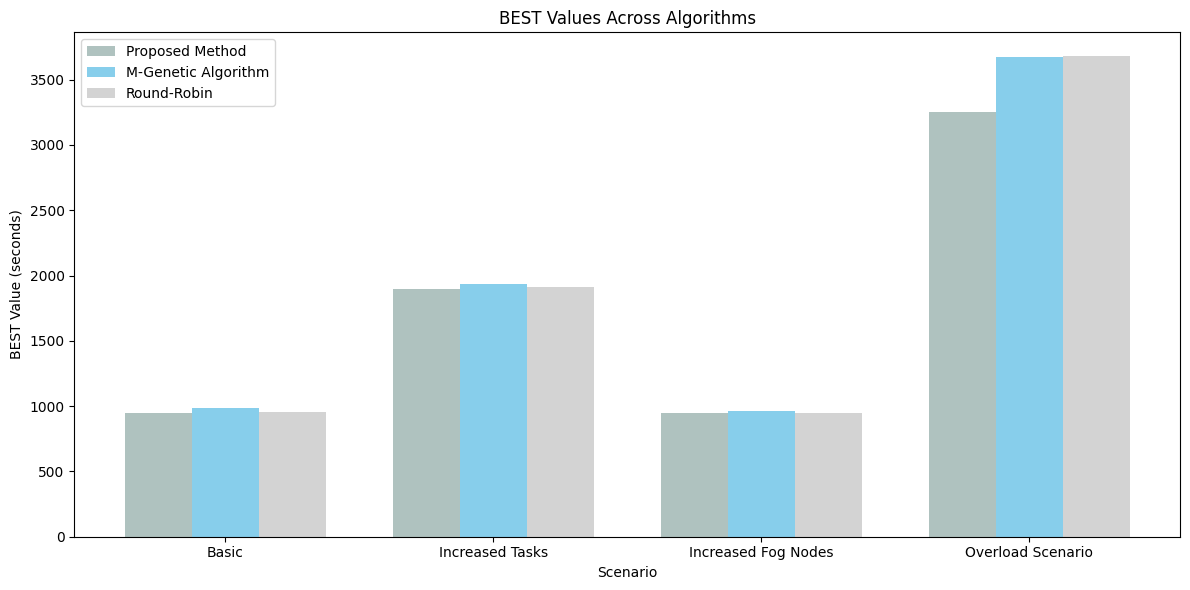

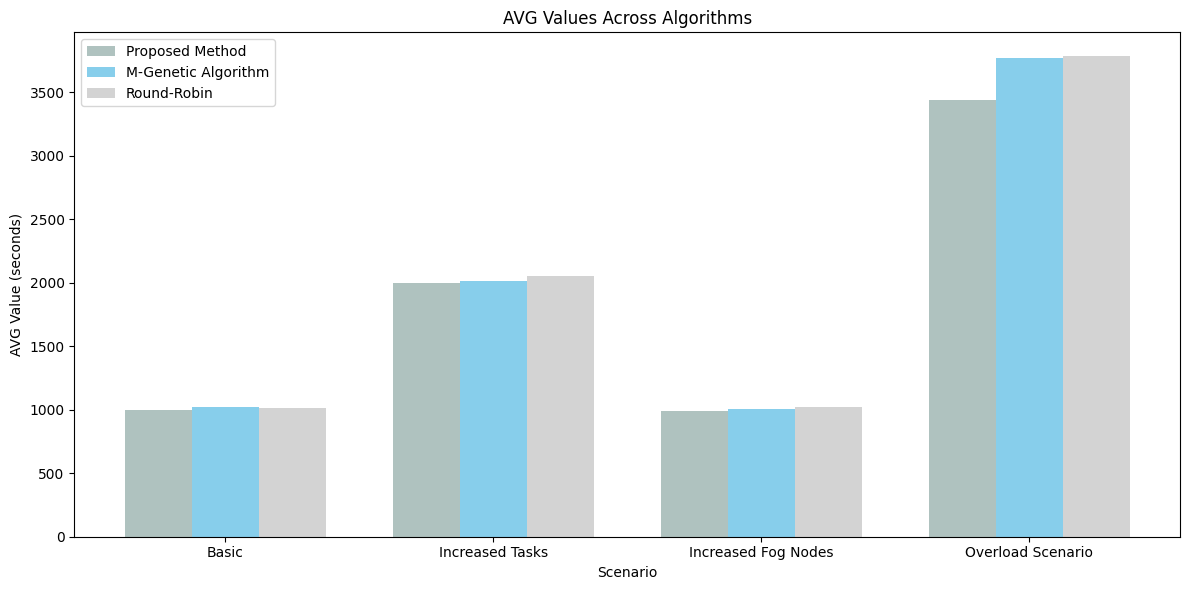

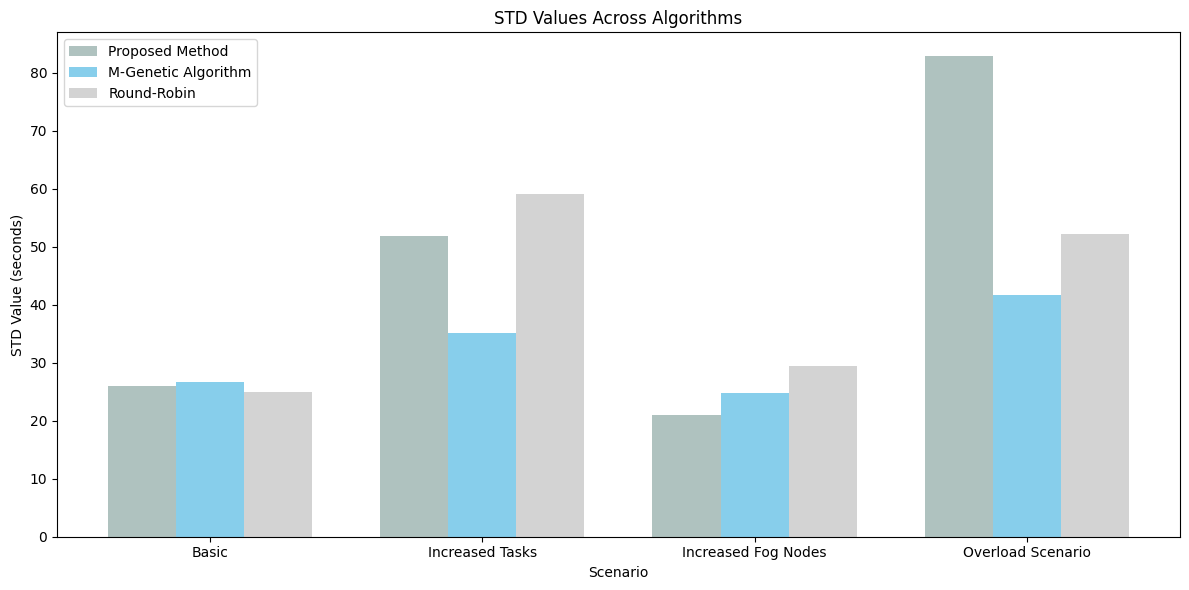

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Tham số mô phỏng
POP_SIZE = 150         # Tăng kích thước quần thể
CROSSOVER_RATE = 0.8   # Tỷ lệ lai ghép
MUTATION_RATE = 0.2    # Tỷ lệ đột biến
MAX_GENERATIONS = 200  # Tăng số thế hệ
CPU_THRESHOLD = 0.8    # Ngưỡng quá tải CPU
NUM_RUNS = 20          # Số lần chạy độc lập
COMMUNICATION_PENALTY = 2.0  # Tăng chi phí phạt cho việc chuyển tác vụ
OVERLOAD_PENALTY = 100.0     # Phạt cho mỗi node quá tải

# Define simulation scenarios
SCENARIOS = [
    {"name": "Basic", "NUM_FOG_NODES": 20, "NUM_TASKS": 500},
    {"name": "Increased Tasks", "NUM_FOG_NODES": 20, "NUM_TASKS": 1000},
    {"name": "Increased Fog Nodes", "NUM_FOG_NODES": 40, "NUM_TASKS": 500},
    {"name": "Overload Scenario", "NUM_FOG_NODES": 20, "NUM_TASKS": 500, "OVERLOADED_NODES": 5}
]

# FogNode class
class FogNode:
    def __init__(self, id, cpu_capacity, bandwidth):
        self.id = id
        self.cpu_capacity = cpu_capacity
        self.bandwidth = bandwidth
        self.current_cpu_load = 0
        self.current_tasks = []

    def reset_load(self):
        self.current_cpu_load = 0
        self.current_tasks = []

# Task class
class Task:
    def __init__(self, id, data_size, processing_time, priority):
        self.id = id
        self.data_size = data_size
        self.processing_time = processing_time
        self.priority = priority
        self.computation_size = data_size * 10

# Initialize system
def initialize_system(num_fog_nodes, num_tasks):
    base_cpu = 3000
    base_bandwidth = 30
    cpu_capacity = [base_cpu + random.uniform(-500, 500) for _ in range(num_fog_nodes)]
    bandwidth = [base_bandwidth + random.uniform(-5, 5) for _ in range(num_fog_nodes)]
    fog_nodes = [FogNode(i, cpu_capacity[i], bandwidth[i]) for i in range(num_fog_nodes)]
    tasks = [Task(i, random.uniform(10, 100), random.uniform(1, 5), random.uniform(0.3, 0.9))
             for i in range(num_tasks)]
    return fog_nodes, tasks

# Compute completion time
def compute_completion_time(node, tasks_assigned):
    if not tasks_assigned:
        return 0.0
    total_computation = sum(task.computation_size for task in tasks_assigned)
    processing_time = total_computation / node.cpu_capacity
    communication_time = sum(task.data_size for task in tasks_assigned) / node.bandwidth
    return processing_time + communication_time

# Fitness function with overload penalty
def fitness_function(solution, fog_nodes, tasks, reassigned_tasks=None, scenario_name=""):
    for node in fog_nodes:
        node.reset_load()
    for task_id, node_id in enumerate(solution):
        fog_nodes[node_id].current_tasks.append(tasks[task_id])
        fog_nodes[node_id].current_cpu_load += tasks[task_id].computation_size
    total_time = sum(compute_completion_time(node, node.current_tasks) for node in fog_nodes)

    # Thêm chi phí phạt nếu có reassignment
    if reassigned_tasks:
        total_time += len(reassigned_tasks) * COMMUNICATION_PENALTY

    # Thêm phạt cho quá tải trong Overload Scenario
    if scenario_name == "Overload Scenario":
        overloaded_nodes, total_overload_excess = evaluate_overload(fog_nodes)
        penalty = overloaded_nodes * OVERLOAD_PENALTY + total_overload_excess * 10
        total_time += penalty
    return total_time

# Check overload
def check_overload(fog_nodes):
    overloaded = False
    for node in fog_nodes:
        cpu_usage = node.current_cpu_load / node.cpu_capacity if node.cpu_capacity > 0 else 0
        if cpu_usage > CPU_THRESHOLD:
            print(f"Node {node.id} overloaded: {cpu_usage:.2f}")
            overloaded = True
    return overloaded

# Evaluate overload
def evaluate_overload(fog_nodes):
    overloaded_nodes = 0
    total_overload_excess = 0.0
    for node in fog_nodes:
        cpu_usage = node.current_cpu_load / node.cpu_capacity if node.cpu_capacity > 0 else 0
        if cpu_usage > CPU_THRESHOLD:
            overloaded_nodes += 1
            total_overload_excess += cpu_usage - CPU_THRESHOLD
    return overloaded_nodes, total_overload_excess

# Initialize population
def initialize_population(popsize, num_tasks, num_fog_nodes, scenario_name):
    if scenario_name == "Overload Scenario":
        population = []
        for _ in range(popsize):
            individual = [0] * num_tasks
            for i in range(int(num_tasks * 0.7)):
                individual[i] = random.randint(0, 4)
            for i in range(int(num_tasks * 0.7), num_tasks):
                individual[i] = random.randint(5, num_fog_nodes - 1)
            random.shuffle(individual)
            population.append(individual)
        return population
    return [[random.randint(0, num_fog_nodes - 1) for _ in range(num_tasks)] for _ in range(popsize)]

# Crossover
def crossover(parent1, parent2, rate):
    if random.random() > rate:
        return parent1[:], parent2[:]
    point = random.randint(1, len(parent1) - 2)
    return parent1[:point] + parent2[point:], parent2[:point] + parent1[point:]

# Mutation
def mutate(individual, num_fog_nodes, rate):
    individual = individual[:]
    for i in range(len(individual)):
        if random.random() < rate:
            individual[i] = random.randint(0, num_fog_nodes - 1)
    return individual

# Selection
def select(population, fitnesses):
    weights = [1 / (f + 1e-6) for f in fitnesses]
    total_weight = sum(weights)
    weights = [w / total_weight for w in weights]
    return random.choices(population, weights=weights, k=1)[0]

# Genetic Algorithm
def genetic_algorithm(popsize, generations, num_fog_nodes, num_tasks, pcrossover, pmutation, fog_nodes, tasks, scenario_name):
    population = initialize_population(popsize, num_tasks, num_fog_nodes, scenario_name)
    for _ in range(generations):
        fitnesses = [fitness_function(ind, fog_nodes, tasks, scenario_name=scenario_name) for ind in population]
        new_population = []
        for _ in range(popsize // 2):
            parent1 = select(population, fitnesses)
            parent2 = select(population, fitnesses)
            child1, child2 = crossover(parent1, parent2, pcrossover)
            child1 = mutate(child1, num_fog_nodes, pmutation)
            child2 = mutate(child2, num_fog_nodes, pmutation)
            new_population.extend([child1, child2])
        population = new_population
    best_solution = min(population, key=lambda x: fitness_function(x, fog_nodes, tasks, scenario_name=scenario_name))
    return fitness_function(best_solution, fog_nodes, tasks, scenario_name=scenario_name)

# Local search
def local_search(individual, fog_nodes, tasks, scenario_name):
    best_individual = individual[:]
    best_fitness = fitness_function(best_individual, fog_nodes, tasks, scenario_name=scenario_name)
    iterations = max(10, len(fog_nodes) // 2)  # Tăng số lần lặp
    for _ in range(iterations):
        neighbor = best_individual[:]
        idx = random.randint(0, len(neighbor) - 1)
        neighbor[idx] = random.randint(0, len(fog_nodes) - 1)
        neighbor_fitness = fitness_function(neighbor, fog_nodes, tasks, scenario_name=scenario_name)
        if neighbor_fitness < best_fitness:
            best_individual = neighbor[:]
            best_fitness = neighbor_fitness
    return best_individual

# Task reassignment
def reassign_tasks(individual, fog_nodes, tasks):
    reassigned_tasks = []
    for node in fog_nodes:
        node.reset_load()
        node.current_tasks = [tasks[i] for i, node_id in enumerate(individual) if node_id == node.id]
        node.current_cpu_load = sum(task.computation_size for task in node.current_tasks)

    # Tăng số lần lặp để tối ưu hóa tốt hơn
    for _ in range(20):
        for node in fog_nodes:
            cpu_usage = node.current_cpu_load / node.cpu_capacity if node.cpu_capacity > 0 else 0
            if cpu_usage > CPU_THRESHOLD and node.current_tasks:
                # Sắp xếp giảm dần theo computation_size
                node.current_tasks.sort(key=lambda t: t.computation_size, reverse=True)
                # Di chuyển tối đa 3 tác vụ nặng nhất nếu có
                for task_to_move in node.current_tasks[:min(3, len(node.current_tasks))]:
                    task_idx = tasks.index(task_to_move)
                    candidate_nodes = [
                        n for n in fog_nodes if n != node and
                        (n.current_cpu_load + task_to_move.computation_size) / n.cpu_capacity < CPU_THRESHOLD
                    ]
                    if candidate_nodes:
                        target_node = max(candidate_nodes, key=lambda n: n.cpu_capacity - n.current_cpu_load)
                        individual[task_idx] = target_node.id
                        node.current_tasks.remove(task_to_move)
                        node.current_cpu_load -= task_to_move.computation_size
                        target_node.current_tasks.append(task_to_move)
                        target_node.current_cpu_load += task_to_move.computation_size
                        reassigned_tasks.append(task_to_move)
    return individual, reassigned_tasks

# Memetic Algorithm
def memetic_algorithm(popsize, generations, num_fog_nodes, num_tasks, pcrossover, pmutation, fog_nodes, tasks, scenario_name):
    population = initialize_population(popsize, num_tasks, num_fog_nodes, scenario_name)
    best_solution = min(population, key=lambda x: fitness_function(x, fog_nodes, tasks, scenario_name=scenario_name))
    best_fitness = fitness_function(best_solution, fog_nodes, tasks, scenario_name=scenario_name)
    best_reassigned_tasks = []

    for _ in range(generations):
        fitness_values = [fitness_function(ind, fog_nodes, tasks, scenario_name=scenario_name) for ind in population]
        new_population = [best_solution[:]]  # Elitism
        while len(new_population) < popsize:
            parents = random.choices(population, weights=[1 / (f + 1e-6) for f in fitness_values], k=2)
            parent1, parent2 = parents[0][:], parents[1][:]
            child1, child2 = crossover(parent1, parent2, pcrossover)
            child1 = mutate(child1, num_fog_nodes, pmutation)
            child2 = mutate(child2, num_fog_nodes, pmutation)
            child1 = local_search(child1, fog_nodes, tasks, scenario_name)
            child2 = local_search(child2, fog_nodes, tasks, scenario_name)
            new_population.extend([child1, child2])
        population = new_population[:popsize]

        if scenario_name == "Overload Scenario":
            reassigned_population = [reassign_tasks(ind, fog_nodes, tasks) for ind in population]
            current_best_idx = min(range(len(reassigned_population)),
                                   key=lambda i: fitness_function(reassigned_population[i][0], fog_nodes, tasks,
                                                                  reassigned_population[i][1], scenario_name))
            current_best, current_reassigned_tasks = reassigned_population[current_best_idx]
            current_fitness = fitness_function(current_best, fog_nodes, tasks, current_reassigned_tasks, scenario_name)
            if current_fitness < best_fitness:
                best_solution = current_best[:]
                best_fitness = current_fitness
                best_reassigned_tasks = current_reassigned_tasks[:]
            population = [ind for ind, _ in reassigned_population]
        else:
            current_best = min(population, key=lambda x: fitness_function(x, fog_nodes, tasks, scenario_name=scenario_name))
            current_fitness = fitness_function(current_best, fog_nodes, tasks, scenario_name=scenario_name)
            if current_fitness < best_fitness:
                best_solution = current_best[:]
                best_fitness = current_fitness

    return best_fitness

# Round-Robin
def round_robin_assignment(num_tasks, num_fog_nodes):
    solution = [task_id % num_fog_nodes for task_id in range(num_tasks)]
    return solution

# Run simulation
def run_simulation():
    scenario_names = [s["name"] for s in SCENARIOS]
    ma_best_results, ma_avg_results, ma_std_results = [], [], []
    ga_best_results, ga_avg_results, ga_std_results = [], [], []
    rr_best_results, rr_avg_results, rr_std_results = [], [], []

    for scenario in SCENARIOS:
        print(f"\n=== Scenario: {scenario['name']} ===")
        num_fog_nodes = scenario["NUM_FOG_NODES"]
        num_tasks = scenario["NUM_TASKS"]

        ma_latencies, ga_latencies, rr_latencies = [], [], []

        for run in range(NUM_RUNS):
            print(f"Run {run + 1}/{NUM_RUNS} for {scenario['name']}")
            fog_nodes, tasks = initialize_system(num_fog_nodes, num_tasks)

            # Memetic Algorithm
            ma_fitness = memetic_algorithm(
                POP_SIZE, MAX_GENERATIONS, num_fog_nodes, num_tasks, CROSSOVER_RATE, MUTATION_RATE, fog_nodes, tasks, scenario["name"]
            )
            ma_latencies.append(ma_fitness)

            # Genetic Algorithm
            fog_nodes, tasks = initialize_system(num_fog_nodes, num_tasks)
            ga_fitness = genetic_algorithm(
                POP_SIZE, MAX_GENERATIONS, num_fog_nodes, num_tasks, CROSSOVER_RATE, MUTATION_RATE, fog_nodes, tasks, scenario["name"]
            )
            ga_latencies.append(ga_fitness)

            # Round-Robin
            fog_nodes, tasks = initialize_system(num_fog_nodes, num_tasks)
            rr_solution = round_robin_assignment(num_tasks, num_fog_nodes)
            rr_fitness = fitness_function(rr_solution, fog_nodes, tasks, scenario_name=scenario["name"])
            rr_latencies.append(rr_fitness)

            if scenario["name"] == "Overload Scenario":
                print("Overload check after Round-Robin:")
                check_overload(fog_nodes)

        # Calculate statistics
        ma_best, ma_avg, ma_std = min(ma_latencies), np.mean(ma_latencies), np.std(ma_latencies)
        ga_best, ga_avg, ga_std = min(ga_latencies), np.mean(ga_latencies), np.std(ga_latencies)
        rr_best, rr_avg, rr_std = min(rr_latencies), np.mean(rr_latencies), np.std(rr_latencies)

        ma_best_results.append(ma_best)
        ma_avg_results.append(ma_avg)
        ma_std_results.append(ma_std)
        ga_best_results.append(ga_best)
        ga_avg_results.append(ga_avg)
        ga_std_results.append(ga_std)
        rr_best_results.append(rr_best)
        rr_avg_results.append(rr_avg)
        rr_std_results.append(rr_std)

        print(f"\nResults for {scenario['name']} after {NUM_RUNS} runs:")
        print(f"Proposed Method:   BEST = {ma_best:.2f}, AVG = {ma_avg:.2f}, STD = {ma_std:.2f}")
        print(f"Genetic Algorithm: BEST = {ga_best:.2f}, AVG = {ga_avg:.2f}, STD = {ga_std:.2f}")
        print(f"Round-Robin:       BEST = {rr_best:.2f}, AVG = {rr_avg:.2f}, STD = {rr_std:.2f}")

    # Plotting
    x = np.arange(len(SCENARIOS))
    width = 0.25

    plt.figure(figsize=(12, 6))
    plt.bar(x - width, ma_best_results, width, label='Proposed Method', color='#AFC2BF')
    plt.bar(x, ga_best_results, width, label='M-Genetic Algorithm', color='#87CEEB')
    plt.bar(x + width, rr_best_results, width, label='Round-Robin', color='#D3D3D3')
    plt.xlabel('Scenario')
    plt.ylabel('BEST Value (seconds)')
    plt.title('BEST Values Across Algorithms')
    plt.xticks(x, scenario_names)
    plt.legend()
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12, 6))
    plt.bar(x - width, ma_avg_results, width, label='Proposed Method', color='#AFC2BF')
    plt.bar(x, ga_avg_results, width, label='M-Genetic Algorithm', color='#87CEEB')
    plt.bar(x + width, rr_avg_results, width, label='Round-Robin', color='#D3D3D3')
    plt.xlabel('Scenario')
    plt.ylabel('AVG Value (seconds)')
    plt.title('AVG Values Across Algorithms')
    plt.xticks(x, scenario_names)
    plt.legend()
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12, 6))
    plt.bar(x - width, ma_std_results, width, label='Proposed Method', color='#AFC2BF')
    plt.bar(x, ga_std_results, width, label='M-Genetic Algorithm', color='#87CEEB')
    plt.bar(x + width, rr_std_results, width, label='Round-Robin', color='#D3D3D3')
    plt.xlabel('Scenario')
    plt.ylabel('STD Value (seconds)')
    plt.title('STD Values Across Algorithms')
    plt.xticks(x, scenario_names)
    plt.legend()
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    random.seed(42)
    np.random.seed(42)
    run_simulation()

vẽ đồ thì dựa vào két quá

đoạn trên viết lại để hi vong ma tối ưu hơn

sửa lại với chat gpt

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

# ======================================
#   CÁC THAM SỐ MÔ PHỎNG (đã tối ưu hơn)
# ======================================
POP_SIZE = 200         # Kích thước quần thể
CROSSOVER_RATE = 0.85  # Tỷ lệ lai ghép
MUTATION_RATE = 0.15   # Tỷ lệ đột biến
MAX_GENERATIONS = 300  # Số thế hệ tiến hoá
CPU_THRESHOLD = 0.8    # Ngưỡng quá tải CPU
NUM_RUNS = 20          # Số lần chạy (để lấy trung bình, sai số...)
COMMUNICATION_PENALTY = 3.0   # Phạt cho mỗi lần chuyển tác vụ
OVERLOAD_PENALTY = 150.0      # Phạt cho mỗi node quá tải

# ==========================================
#   ĐỊNH NGHĨA CÁC KỊCH BẢN MÔ PHỎNG
# ==========================================
SCENARIOS = [
    {"name": "Basic",               "NUM_FOG_NODES": 20, "NUM_TASKS": 500},
    {"name": "Increased Tasks",     "NUM_FOG_NODES": 20, "NUM_TASKS": 1000},
    {"name": "Increased Fog Nodes", "NUM_FOG_NODES": 40, "NUM_TASKS": 500},
    {"name": "Overload Scenario",   "NUM_FOG_NODES": 20, "NUM_TASKS": 500, "OVERLOADED_NODES": 5}
]

# =====================================
#   ĐỊNH NGHĨA LỚP FOG NODE & TASK
# =====================================
class FogNode:
    def __init__(self, id, cpu_capacity, bandwidth):
        self.id = id
        self.cpu_capacity = cpu_capacity
        self.bandwidth = bandwidth
        self.current_cpu_load = 0
        self.current_tasks = []

    def reset_load(self):
        self.current_cpu_load = 0
        self.current_tasks = []

class Task:
    def __init__(self, id, data_size, processing_time, priority):
        self.id = id
        self.data_size = data_size
        self.processing_time = processing_time
        self.priority = priority
        # Giả sử mỗi 1 đơn vị data_size -> 10 đơn vị tính toán
        self.computation_size = data_size * 10

# ===========================================================
#   KHỞI TẠO HỆ THỐNG (DANH SÁCH FOG NODES VÀ TASKS) THEO SCENARIO
# ===========================================================
def initialize_system(num_fog_nodes, num_tasks):
    base_cpu = 3000
    base_bandwidth = 30
    # Tạo ra dải CPU capacity và bandwidth ngẫu nhiên quanh giá trị base
    cpu_capacity = [base_cpu + random.uniform(-500, 500) for _ in range(num_fog_nodes)]
    bandwidth = [base_bandwidth + random.uniform(-5, 5) for _ in range(num_fog_nodes)]

    fog_nodes = [FogNode(i, cpu_capacity[i], bandwidth[i]) for i in range(num_fog_nodes)]
    tasks = [Task(i, random.uniform(10, 100), random.uniform(1, 5), random.uniform(0.3, 0.9))
             for i in range(num_tasks)]
    return fog_nodes, tasks

# ===============================
#   TÍNH THỜI GIAN HOÀN THÀNH
# ===============================
def compute_completion_time(node, tasks_assigned):
    if not tasks_assigned:
        return 0.0
    total_computation = sum(task.computation_size for task in tasks_assigned)

    # Tránh chia 0
    if node.cpu_capacity <= 0:
        processing_time = 999999
    else:
        processing_time = total_computation / node.cpu_capacity

    if node.bandwidth <= 0:
        communication_time = 999999
    else:
        communication_time = sum(task.data_size for task in tasks_assigned) / node.bandwidth

    return processing_time + communication_time

# =================================================
#   HÀM FITNESS (TÍNH TỔNG THỜI GIAN + PHẠT)
# =================================================
def fitness_function(solution, fog_nodes, tasks, reassigned_tasks=None, scenario_name=""):
    # 1) Reset cho mỗi node
    for node in fog_nodes:
        node.reset_load()
    # 2) Gán task vào node dựa trên solution
    for task_id, node_id in enumerate(solution):
        fog_nodes[node_id].current_tasks.append(tasks[task_id])
        fog_nodes[node_id].current_cpu_load += tasks[task_id].computation_size

    # 3) Tính tổng completion time của tất cả node
    total_time = sum(compute_completion_time(node, node.current_tasks) for node in fog_nodes)

    # 4) Cộng phạt nếu có reassigned_tasks
    if reassigned_tasks:
        total_time += len(reassigned_tasks) * COMMUNICATION_PENALTY

    # 5) Phạt quá tải (đặc biệt cho Overload Scenario)
    overloaded_nodes, total_overload_excess = evaluate_overload(fog_nodes)
    if scenario_name == "Overload Scenario":
        penalty = overloaded_nodes * OVERLOAD_PENALTY + total_overload_excess * 10
        total_time += penalty
    else:
        # Nếu muốn phạt cho tất cả scenario, bạn cũng có thể cộng chung:
        # penalty = overloaded_nodes * 50 + total_overload_excess * 5
        # total_time += penalty
        pass

    return total_time

# ======================
#   KIỂM TRA QUÁ TẢI
# ======================
def check_overload(fog_nodes):
    overloaded = False
    for node in fog_nodes:
        cpu_usage = node.current_cpu_load / node.cpu_capacity if node.cpu_capacity > 0 else 0
        if cpu_usage > CPU_THRESHOLD:
            print(f"Node {node.id} overloaded with usage = {cpu_usage:.2f}")
            overloaded = True
    return overloaded

def evaluate_overload(fog_nodes):
    overloaded_nodes = 0
    total_overload_excess = 0.0
    for node in fog_nodes:
        cpu_usage = node.current_cpu_load / node.cpu_capacity if node.cpu_capacity > 0 else 0
        if cpu_usage > CPU_THRESHOLD:
            overloaded_nodes += 1
            total_overload_excess += (cpu_usage - CPU_THRESHOLD)
    return overloaded_nodes, total_overload_excess

# ==========================
#   KHỞI TẠO QUẦN THỂ
# ==========================
def initialize_population(popsize, num_tasks, num_fog_nodes, scenario_name):
    """
    Tạo quần thể ngẫu nhiên. Riêng Overload Scenario,
    ta có thể gán 1 phần lớn tasks cho một số node "thấp" để tạo tình huống quá tải ban đầu.
    """
    if scenario_name == "Overload Scenario":
        population = []
        for _ in range(popsize):
            individual = [0] * num_tasks
            # 70% tasks ban đầu gán vào node 0..4 (giả sử node 0..4 dễ bị quá tải)
            for i in range(int(num_tasks * 0.7)):
                individual[i] = random.randint(0, 4)
            # 30% tasks còn lại gán node còn lại
            for i in range(int(num_tasks * 0.7), num_tasks):
                individual[i] = random.randint(5, num_fog_nodes - 1)
            random.shuffle(individual)
            population.append(individual)
        return population
    else:
        # Kịch bản thường: gán hoàn toàn ngẫu nhiên
        return [[random.randint(0, num_fog_nodes - 1) for _ in range(num_tasks)] for _ in range(popsize)]

# ================
#   Crossover
# ================
def crossover(parent1, parent2, rate):
    if random.random() > rate:
        return parent1[:], parent2[:]
    point = random.randint(1, len(parent1) - 2)
    child1 = parent1[:point] + parent2[point:]
    child2 = parent2[:point] + parent1[point:]
    return child1, child2

# ================
#   Mutation
# ================
def mutate(individual, num_fog_nodes, rate):
    mutant = individual[:]
    for i in range(len(mutant)):
        if random.random() < rate:
            mutant[i] = random.randint(0, num_fog_nodes - 1)
    return mutant

# =========================================
#   Chọn lọc Roulette (tỉ lệ nghịch fitness)
# =========================================
def select(population, fitnesses):
    # fitness càng thấp => weight càng cao
    weights = [1 / (f + 1e-6) for f in fitnesses]
    total_weight = sum(weights)
    weights = [w / total_weight for w in weights]
    return random.choices(population, weights=weights, k=1)[0]

# =======================
#   Thuật toán GA cơ bản
# =======================
def genetic_algorithm(popsize, generations, num_fog_nodes, num_tasks, pcrossover, pmutation, fog_nodes, tasks, scenario_name):
    population = initialize_population(popsize, num_tasks, num_fog_nodes, scenario_name)

    for _ in range(generations):
        fitnesses = [fitness_function(ind, fog_nodes, tasks, scenario_name=scenario_name) for ind in population]
        new_population = []
        # Tạo cặp (parent1, parent2) => (child1, child2)
        for _ in range(popsize // 2):
            parent1 = select(population, fitnesses)
            parent2 = select(population, fitnesses)
            child1, child2 = crossover(parent1, parent2, pcrossover)
            child1 = mutate(child1, num_fog_nodes, pmutation)
            child2 = mutate(child2, num_fog_nodes, pmutation)
            new_population.extend([child1, child2])
        population = new_population

    # Tìm best solution cuối cùng
    best_solution = min(population, key=lambda x: fitness_function(x, fog_nodes, tasks, scenario_name=scenario_name))
    best_fitness = fitness_function(best_solution, fog_nodes, tasks, scenario_name=scenario_name)
    return best_fitness

# ============================
#   LOCAL SEARCH (cải tiến cục bộ)
# ============================
def local_search(individual, fog_nodes, tasks, scenario_name):
    best_individual = individual[:]
    best_fitness = fitness_function(best_individual, fog_nodes, tasks, scenario_name=scenario_name)

    # Tăng iterations để “dò” nhiều lân cận hơn
    iterations = max(10, len(fog_nodes))
    for _ in range(iterations):
        neighbor = best_individual[:]
        idx = random.randint(0, len(neighbor) - 1)
        neighbor[idx] = random.randint(0, len(fog_nodes) - 1)
        neighbor_fitness = fitness_function(neighbor, fog_nodes, tasks, scenario_name=scenario_name)
        if neighbor_fitness < best_fitness:
            best_individual = neighbor[:]
            best_fitness = neighbor_fitness
    return best_individual

# =================================
#   REASSIGN TASKS (Tái phân bổ)
# =================================
def reassign_tasks(individual, fog_nodes, tasks, max_iterations=20):
    """
    Giảm tải cho node bị quá tải bằng cách chuyển các tác vụ nặng
    sang node có CPU usage còn trống dưới threshold.
    """
    reassigned_tasks = []

    # Cập nhật current_tasks và current_cpu_load
    for node in fog_nodes:
        node.reset_load()
        node.current_tasks = []
    for task_idx, node_idx in enumerate(individual):
        fog_nodes[node_idx].current_tasks.append(tasks[task_idx])
    for node in fog_nodes:
        node.current_cpu_load = sum(t.computation_size for t in node.current_tasks)

    # Lặp nhiều vòng để “san tải” triệt để
    for _ in range(max_iterations):
        for node in fog_nodes:
            cpu_usage = node.current_cpu_load / node.cpu_capacity if node.cpu_capacity > 0 else 0
            if cpu_usage > CPU_THRESHOLD and node.current_tasks:
                # Sắp xếp giảm dần theo computation_size
                node.current_tasks.sort(key=lambda t: t.computation_size, reverse=True)
                # Di chuyển tối đa 3 tác vụ nặng nhất
                for task_to_move in node.current_tasks[:min(3, len(node.current_tasks))]:
                    task_idx = task_to_move.id
                    # Tìm node đích (candidate)
                    candidate_nodes = []
                    for n in fog_nodes:
                        if n.id != node.id:
                            new_usage = (n.current_cpu_load + task_to_move.computation_size) / n.cpu_capacity
                            if new_usage < CPU_THRESHOLD:
                                candidate_nodes.append(n)
                    if candidate_nodes:
                        # Chọn node “dư” CPU nhiều nhất
                        target_node = max(candidate_nodes, key=lambda n: n.cpu_capacity - n.current_cpu_load)
                        # Cập nhật solution
                        individual[task_idx] = target_node.id

                        # Cập nhật node nguồn
                        node.current_tasks.remove(task_to_move)
                        node.current_cpu_load -= task_to_move.computation_size

                        # Cập nhật node đích
                        target_node.current_tasks.append(task_to_move)
                        target_node.current_cpu_load += task_to_move.computation_size

                        # Ghi nhận tác vụ đã reassigned (để cộng penalty)
                        reassigned_tasks.append(task_to_move)
    return individual, reassigned_tasks

# ========================================
#   THUẬT TOÁN ĐỀ XUẤT (Proposed Method)
#   - GA + Local Search + Reassign Tasks
#   - Áp dụng cho tất cả kịch bản
# ========================================
def proposed_method(popsize, generations, num_fog_nodes, num_tasks, pcrossover, pmutation, fog_nodes, tasks, scenario_name):
    # 1) Khởi tạo quần thể
    population = initialize_population(popsize, num_tasks, num_fog_nodes, scenario_name)

    # Tìm best trong quần thể
    best_solution = min(population, key=lambda x: fitness_function(x, fog_nodes, tasks, scenario_name=scenario_name))
    best_fitness = fitness_function(best_solution, fog_nodes, tasks, scenario_name=scenario_name)
    best_reassigned_tasks = []

    for _ in range(generations):
        # Tính fitness cho quần thể
        fitness_values = [fitness_function(ind, fog_nodes, tasks, scenario_name=scenario_name) for ind in population]

        # Elitism: giữ lại 1 cá thể tốt nhất
        current_best_idx = np.argmin(fitness_values)
        current_best_solution = population[current_best_idx]
        current_best_fitness = fitness_values[current_best_idx]

        new_population = [current_best_solution[:]]

        # Tạo phần còn lại của thế hệ
        while len(new_population) < popsize:
            parents = random.choices(population, weights=[1/(f+1e-6) for f in fitness_values], k=2)
            parent1, parent2 = parents[0][:], parents[1][:]
            child1, child2 = crossover(parent1, parent2, pcrossover)
            child1 = mutate(child1, num_fog_nodes, pmutation)
            child2 = mutate(child2, num_fog_nodes, pmutation)

            # Local Search
            child1 = local_search(child1, fog_nodes, tasks, scenario_name)
            child2 = local_search(child2, fog_nodes, tasks, scenario_name)

            new_population.extend([child1, child2])

        population = new_population[:popsize]

        # Tìm best trong thế hệ
        new_fitness_values = [fitness_function(ind, fog_nodes, tasks, scenario_name=scenario_name) for ind in population]
        generation_best_idx = np.argmin(new_fitness_values)
        generation_best_sol = population[generation_best_idx]
        generation_best_fit = new_fitness_values[generation_best_idx]

        # Bước Reassign (áp dụng cho tất cả scenario)
        reassigned_sol, re_tasks = reassign_tasks(generation_best_sol[:], fog_nodes, tasks, max_iterations=20)
        after_reassign_fitness = fitness_function(reassigned_sol, fog_nodes, tasks, re_tasks, scenario_name)

        # So sánh với best fitness toàn cục
        if after_reassign_fitness < best_fitness:
            best_solution = reassigned_sol[:]
            best_fitness = after_reassign_fitness
            best_reassigned_tasks = re_tasks[:]

    return best_fitness

# =========================
#   ROUND ROBIN (so sánh)
# =========================
def round_robin_assignment(num_tasks, num_fog_nodes):
    # Mỗi task gán vào node = task_id % num_fog_nodes
    return [task_id % num_fog_nodes for task_id in range(num_tasks)]

# ======================
#   HÀM CHẠY MÔ PHỎNG
# ======================
def run_simulation():
    scenario_names = [s["name"] for s in SCENARIOS]

    # Kết quả Proposed Method
    pm_best_results, pm_avg_results, pm_std_results = [], [], []
    # Kết quả GA
    ga_best_results, ga_avg_results, ga_std_results = [], [], []
    # Kết quả RoundRobin
    rr_best_results, rr_avg_results, rr_std_results = [], [], []

    for scenario in SCENARIOS:
        print(f"\n=== Scenario: {scenario['name']} ===")
        num_fog_nodes = scenario["NUM_FOG_NODES"]
        num_tasks = scenario["NUM_TASKS"]

        pm_latencies, ga_latencies, rr_latencies = [], [], []

        for run_i in range(NUM_RUNS):
            print(f"Run {run_i + 1}/{NUM_RUNS} for {scenario['name']}")
            # Khởi tạo FogNodes & Tasks
            fog_nodes, tasks = initialize_system(num_fog_nodes, num_tasks)

            # Proposed Method
            pm_fitness = proposed_method(
                POP_SIZE, MAX_GENERATIONS, num_fog_nodes, num_tasks,
                CROSSOVER_RATE, MUTATION_RATE, fog_nodes, tasks, scenario["name"]
            )
            pm_latencies.append(pm_fitness)

            # Genetic Algorithm
            fog_nodes, tasks = initialize_system(num_fog_nodes, num_tasks)
            ga_fitness = genetic_algorithm(
                POP_SIZE, MAX_GENERATIONS, num_fog_nodes, num_tasks,
                CROSSOVER_RATE, MUTATION_RATE, fog_nodes, tasks, scenario["name"]
            )
            ga_latencies.append(ga_fitness)

            # RoundRobin
            fog_nodes, tasks = initialize_system(num_fog_nodes, num_tasks)
            rr_solution = round_robin_assignment(num_tasks, num_fog_nodes)
            rr_fitness = fitness_function(rr_solution, fog_nodes, tasks, scenario_name=scenario["name"])
            rr_latencies.append(rr_fitness)

            if scenario["name"] == "Overload Scenario":
                # Kiểm tra overload sau round-robin
                print("Overload check after Round-Robin:")
                check_overload(fog_nodes)

        # Tính thống kê
        pm_best, pm_avg, pm_std = min(pm_latencies), np.mean(pm_latencies), np.std(pm_latencies)
        ga_best, ga_avg, ga_std = min(ga_latencies), np.mean(ga_latencies), np.std(ga_latencies)
        rr_best, rr_avg, rr_std = min(rr_latencies), np.mean(rr_latencies), np.std(rr_latencies)

        pm_best_results.append(pm_best)
        pm_avg_results.append(pm_avg)
        pm_std_results.append(pm_std)

        ga_best_results.append(ga_best)
        ga_avg_results.append(ga_avg)
        ga_std_results.append(ga_std)

        rr_best_results.append(rr_best)
        rr_avg_results.append(rr_avg)
        rr_std_results.append(rr_std)

        print(f"\nResults for {scenario['name']} after {NUM_RUNS} runs:")
        print(f"Proposed Method:   BEST = {pm_best:.2f}, AVG = {pm_avg:.2f}, STD = {pm_std:.2f}")
        print(f"Genetic Algorithm: BEST = {ga_best:.2f}, AVG = {ga_avg:.2f}, STD = {ga_std:.2f}")
        print(f"Round-Robin:       BEST = {rr_best:.2f}, AVG = {rr_avg:.2f}, STD = {rr_std:.2f}")

    # =========
    # VẼ BIỂU ĐỒ
    # =========
    x = np.arange(len(SCENARIOS))
    width = 0.25

    # 1) BEST
    plt.figure(figsize=(12, 6))
    plt.bar(x - width, pm_best_results, width, label='Proposed Method')
    plt.bar(x, ga_best_results, width, label='Genetic Algorithm')
    plt.bar(x + width, rr_best_results, width, label='Round-Robin')
    plt.xlabel('Scenario')
    plt.ylabel('BEST Value (seconds)')
    plt.title('BEST Values Across Algorithms')
    plt.xticks(x, scenario_names)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # 2) AVG
    plt.figure(figsize=(12, 6))
    plt.bar(x - width, pm_avg_results, width, label='Proposed Method')
    plt.bar(x, ga_avg_results, width, label='Genetic Algorithm')
    plt.bar(x + width, rr_avg_results, width, label='Round-Robin')
    plt.xlabel('Scenario')
    plt.ylabel('AVG Value (seconds)')
    plt.title('AVG Values Across Algorithms')
    plt.xticks(x, scenario_names)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # 3) STD
    plt.figure(figsize=(12, 6))
    plt.bar(x - width, pm_std_results, width, label='Proposed Method')
    plt.bar(x, ga_std_results, width, label='Genetic Algorithm')
    plt.bar(x + width, rr_std_results, width, label='Round-Robin')
    plt.xlabel('Scenario')
    plt.ylabel('STD Value (seconds)')
    plt.title('STD Values Across Algorithms')
    plt.xticks(x, scenario_names)
    plt.legend()
    plt.tight_layout()
    plt.show()

# ===============================
#   CHẠY MAIN
# ===============================
if __name__ == "__main__":
    random.seed(42)
    np.random.seed(42)
    run_simulation()



=== Scenario: Basic ===
Run 1/20 for Basic
Run 2/20 for Basic
Run 3/20 for Basic
Run 4/20 for Basic
Run 5/20 for Basic
Run 6/20 for Basic
Run 7/20 for Basic
Run 8/20 for Basic
Run 9/20 for Basic
Run 10/20 for Basic
Run 11/20 for Basic
Run 12/20 for Basic
Run 13/20 for Basic
Run 14/20 for Basic
Run 15/20 for Basic
Run 16/20 for Basic
Run 17/20 for Basic
Run 18/20 for Basic
Run 19/20 for Basic
Run 20/20 for Basic

Results for Basic after 20 runs:
Proposed Method:   BEST = 920.00, AVG = 985.75, STD = 27.37
Genetic Algorithm: BEST = 957.22, AVG = 1014.43, STD = 29.34
Round-Robin:       BEST = 983.84, AVG = 1024.99, STD = 29.87

=== Scenario: Increased Tasks ===
Run 1/20 for Increased Tasks
Run 2/20 for Increased Tasks
Run 3/20 for Increased Tasks
Run 4/20 for Increased Tasks
Run 5/20 for Increased Tasks
Run 6/20 for Increased Tasks
Run 7/20 for Increased Tasks
Run 8/20 for Increased Tasks
Run 9/20 for Increased Tasks
Run 10/20 for Increased Tasks
Run 11/20 for Increased Tasks
Run 12/20 fo